<span style="color: red; font-weight: bold; text-align: center; display: block; margin: auto; font-size: 2em;">Lapage</span>

**Résumé de la demande :**

La mission consiste en trois étapes principales :

**Résumé Synthétique des demandes d'Antoine et Julie :**

**Antoine - Analyse Globale des Ventes :**
1. **Chiffre d'Affaires :**
   - Indicateurs clés (kpi) et graphiques sur le chiffre d'affaire.
   - Évolution temporelle du chiffre d'affaire.
   - Décomposition en moyenne mobile pour évaluer la tendance globale.

2. **Analyse des Références :**
   - Identifier les tops et flops des références.
   - Répartition des ventes par catégorie de produits.

3. **Profils des Clients :**
   - Collecter des informations sur les profils des clients.
   - Explorer la répartition du chiffre d'affaires entre les différents profils.
   
4. **Courbe de Lorenz :**
   - Calculer et visualiser la courbe de Lorenz pour comprendre la répartition du chiffre d'affaires entre les clients.


**Julie - Analyse des Comportements Clients :**
1. **Corrélation entre le Genre et les Catégories de Livres :**
   - Examiner le lien entre le genre des clients et les catégories de livres achetés.
   - Insights sur les préférences de catégories en fonction du genre.

2. **Corrélation entre l'Âge et le Montant Total des Achats :**
   - Analyser la corrélation entre l'âge des clients et le montant total des achats.
   - Identifier les tendances d'achat en fonction de différentes tranches d'âge.

3. **Corrélation entre l'Âge et la Fréquence d'Achat :**
   - Étudier la corrélation entre l'âge des clients et la fréquence d'achat.
   - Identifier si la fréquence d'achat varie en fonction de l'âge.

4. **Corrélation entre l'Âge et le Panier Moyen :**
   - Examiner la corrélation entre l'âge des clients et la taille moyenne du panier d'achat.
   - Fournir des informations sur la relation entre l'âge et les habitudes d'achat.

5. **Corrélation entre l'Âge et la Catégorie des Livres Achetés :**
   - Analyser le lien entre l'âge des clients et la catégorie des livres achetés.
   - Identifier les préférences de catégories en fonction de l'âge.

**Conclusion :**
   - L'analyse globale couvre le chiffre d'affaires, les références, les profils clients, et la répartition équitable du chiffre d'affaires.
   - L'analyse des comportements clients explore des corrélations clés entre le genre, l'âge et divers aspects des habitudes d'achat.
   
Ces analyses complètes permettront d'obtenir des insights approfondis sur les performances de l'entreprise et les comportements des clients.

<span style="color:blue; font-weight:bold; font-size:2em;">I] Importations des librairies et fichiers csv</span>

In [50]:
#Importations des librairies nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as s
from scipy.stats import rankdata
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime, timedelta
import random
from matplotlib.ticker import FuncFormatter


In [51]:
import pandas as pd

# Chargez les données depuis le fichier CSV dans un DataFrame
customers = pd.read_csv('C:\\Users\\Rorsharks\\Desktop\\p6\\customers.csv', sep=';')
products = pd.read_csv('C:\\Users\\Rorsharks\\Desktop\\p6\\products.csv', sep=';')
transactions = pd.read_csv('C:\\Users\\Rorsharks\\Desktop\\p6\\Transactions.csv', sep=';')

# Affichez les premières lignes du DataFrame
display(customers.head())
display(products.head())
display(transactions.head())


,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033


<span style="color:blue; font-weight:bold; font-size:2em;">II] Vérifications</span>

#### <span style="color: #87CEEB;">a.II) Vérification des fichiers</span>


In [52]:
#Vérifications des valeurs manquantes
print(customers.isnull().sum(),'\n')

print(products.isnull().sum(),'\n')

print(transactions.isnull().sum())


client_id    0
sex          0
birth        0
dtype: int64 

id_prod    0
price      0
categ      0
dtype: int64 

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64


In [53]:
print(transactions.shape)
print(products.shape)
print(customers.shape)

(687534, 4)
(3286, 3)
(8621, 3)


In [54]:
# Vérifications du fichier customers 

# Vérifier les doublons
doublons = customers[customers.duplicated()]
if not doublons.empty:
    print("Doublons détectés:")
    print(doublons)
else:
    print("Aucun doublon détecté.")

# Vérifier les valeurs NaN
valeurs_nan = customers[customers.isna().any(axis=1)]
if not valeurs_nan.empty:
    print("\nValeurs NaN détectées:")
    print(valeurs_nan)
else:
    print("Aucune valeur NaN détectée.")

# Vérifier les valeurs égales à 0
valeurs_egales_0 = customers[(customers.applymap(lambda x: isinstance(x, (int, float)) and x == 0)).any(axis=1)]
if not valeurs_egales_0.empty:
    print("\nValeurs égales à 0 détectées:")
    print(valeurs_egales_0)
else:
    print("Aucune valeur égale à 0 détectée.")

# Vérifier les valeurs inférieures à 0
valeurs_inf_0 = customers[(customers.applymap(lambda x: isinstance(x, (int, float)) and x < 0)).any(axis=1)]
if not valeurs_inf_0.empty:
    print("\nValeurs inférieures à 0 détectées:")
    print(valeurs_inf_0)
else:
    print("Aucune valeur inférieure à 0 détectée.")

# Afficher des statistiques générales sur le DataFrame
print("\nStatistiques générales:")
display(customers.describe())

print("\nTypes de données par colonne:")
print(customers.dtypes)

print("\nDimensions du DataFrame:")

Aucun doublon détecté.
Aucune valeur NaN détectée.
Aucune valeur égale à 0 détectée.
Aucune valeur inférieure à 0 détectée.

Statistiques générales:


,birth
count,8621.000000
mean,1978.275606
std,16.917958
min,1929.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000



Types de données par colonne:
client_id    object
sex          object
birth         int64
dtype: object

Dimensions du DataFrame:


In [55]:
# Vérifications  du fichier products 

# Vérifier les doublons
doublons = products[products.duplicated()]
if not doublons.empty:
    print("Doublons détectés:")
    print(doublons)
else:
    print("Aucun doublon détecté.")

# Vérifier les valeurs NaN
valeurs_nan = products[products.isna().any(axis=1)]
if not valeurs_nan.empty:
    print("\nValeurs NaN détectées:")
    print(valeurs_nan)
else:
    print("Aucune valeur NaN détectée.")

# Vérifier les valeurs égales à 0
valeurs_egales_0 = products[(products.applymap(lambda x: isinstance(x, (int, float)) and x == 0)).any(axis=1)]
if not valeurs_egales_0.empty:
    print("\nValeurs égales à 0 détectées:")
    print(valeurs_egales_0)
else:
    print("Aucune valeur égale à 0 détectée.")

# Vérifier les valeurs inférieures à 0
valeurs_inf_0 = products[(products.applymap(lambda x: isinstance(x, (int, float)) and x < 0)).any(axis=1)]
if not valeurs_inf_0.empty:
    print("\nValeurs inférieures à 0 détectées:")
    print(valeurs_inf_0)
else:
    print("Aucune valeur inférieure à 0 détectée.")

# Afficher des statistiques générales sur le DataFrame
print("\nStatistiques générales:")
display(products.describe())

print("\nTypes de données par colonne:")
print(products.dtypes)

print("\nDimensions du DataFrame:")
print(products.shape)


Aucun doublon détecté.
Aucune valeur NaN détectée.

Valeurs égales à 0 détectées:
     id_prod  price  categ
0     0_1421  19.99      0
1     0_1368   5.13      0
2      0_731  17.99      0
4     0_1507   3.99      0
5     0_1163   9.99      0
...      ...    ...    ...
3279  0_1314  20.63      0
3280   0_607  14.99      0
3282   0_146  17.14      0
3283   0_802  11.22      0
3285  0_1920  25.16      0

[2308 rows x 3 columns]
Aucune valeur inférieure à 0 détectée.

Statistiques générales:


,price,categ
count,3286.000000,3286.000000
mean,21.863597,0.370359
std,29.849786,0.615446
min,0.620000,0.000000
25%,6.990000,0.000000
50%,13.075000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000



Types de données par colonne:
id_prod     object
price      float64
categ        int64
dtype: object

Dimensions du DataFrame:
(3286, 3)


In [56]:
#Vérifications du fichier transactions

# Vérifier les doublons
doublons = transactions[transactions.duplicated()]
if not doublons.empty:
    print("Doublons détectés:")
    print(doublons)
else:
    print("Aucun doublon détecté.")

# Vérifier les valeurs NaN
valeurs_nan = transactions[transactions.isna().any(axis=1)]
if not valeurs_nan.empty:
    print("\nValeurs NaN détectées:")
    print(valeurs_nan)
else:
    print("Aucune valeur NaN détectée.")

# Vérifier les valeurs égales à 0
valeurs_egales_0 = transactions[(transactions.applymap(lambda x: isinstance(x, (int, float)) and x == 0)).any(axis=1)]
if not valeurs_egales_0.empty:
    print("\nValeurs égales à 0 détectées:")
    print(valeurs_egales_0)
else:
    print("Aucune valeur égale à 0 détectée.")

# Vérifier les valeurs inférieures à 0
valeurs_inf_0 = transactions[(transactions.applymap(lambda x: isinstance(x, (int, float)) and x < 0)).any(axis=1)]
if not valeurs_inf_0.empty:
    print("\nValeurs inférieures à 0 détectées:")
    print(valeurs_inf_0)
else:
    print("Aucune valeur inférieure à 0 détectée.")

# Afficher des statistiques générales sur le DataFrame
print("\nStatistiques générales:")
display(transactions.describe())

print("\nTypes de données par colonne:")
print(transactions.dtypes)

print("\nDimensions du DataFrame:")
print(transactions.shape)

Aucun doublon détecté.
Aucune valeur NaN détectée.
Aucune valeur égale à 0 détectée.
Aucune valeur inférieure à 0 détectée.

Statistiques générales:


,id_prod,date,session_id,client_id
count,687534,687534,687534,687534
unique,3265,687419,345505,8600
top,1_369,2021-10-06 21:29:59.752585,s_118668,c_1609
freq,2340,2,14,25586



Types de données par colonne:
id_prod       object
date          object
session_id    object
client_id     object
dtype: object

Dimensions du DataFrame:
(687534, 4)


<span style="color:darkorange;">Les fichiers sont intègres et ne présentent aucune anomalie ni aberration.</span>


#### <span style="color: #87CEEB;">b.II) Merge</span>

In [57]:
# Effectuer une jointure interne (inner join) entre les DataFrames 'products' et 'transactions'
# en utilisant la colonne 'id_prod' comme clé de jointure
prod_transactions = pd.merge(products, transactions, left_on='id_prod', right_on='id_prod', how='inner')

# Afficher le résultat de la jointure interne
display(prod_transactions)

print(prod_transactions.shape)


,id_prod,price,categ,date,session_id,client_id
0,0_1421,19.99,0,2021-03-01 04:13:00.107748,s_101,c_8533
1,0_1421,19.99,0,2021-03-01 13:48:20.214075,s_285,c_5299
2,0_1421,19.99,0,2021-03-01 15:07:42.730079,s_317,c_8024
3,0_1421,19.99,0,2021-03-02 03:39:21.811833,s_563,c_7702
4,0_1421,19.99,0,2021-03-02 19:09:41.789425,s_850,c_4057
...,...,...,...,...,...,...
687529,1_140,38.56,1,2022-12-09 14:20:34.169187,s_309513,c_7406
687530,0_1920,25.16,0,2021-04-13 18:36:10.252971,s_20115,c_7088
687531,0_1920,25.16,0,2021-05-30 02:37:22.371278,s_41465,c_7748
687532,0_1920,25.16,0,2022-12-30 02:37:22.371278,s_319303,c_7748


(687534, 6)


In [58]:
# Effectuer une jointure interne (inner join) entre les DataFrames 'prod_transactions' et 'customers'
# en utilisant la colonne 'client_id' comme clé de jointure
transac_customers = pd.merge(prod_transactions, customers, left_on='client_id', right_on='client_id', how='inner')

# Afficher le résultat de la jointure interne
display(transac_customers)

print(transac_customers.shape)

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1421,19.99,0,2021-03-01 04:13:00.107748,s_101,c_8533,m,1972
1,0_1421,19.99,0,2022-10-01 04:13:00.107748,s_276043,c_8533,m,1972
2,0_1421,19.99,0,2022-12-01 04:13:00.107748,s_305391,c_8533,m,1972
3,0_1421,19.99,0,2023-01-01 04:13:00.107748,s_320253,c_8533,m,1972
4,0_2199,12.99,0,2021-03-25 17:43:48.819074,s_11366,c_8533,m,1972
...,...,...,...,...,...,...,...,...
687529,2_163,68.99,2,2022-10-28 16:51:07.389515,s_289331,c_7739,m,1997
687530,2_101,63.99,2,2021-07-21 09:11:12.619736,s_65192,c_7089,m,2002
687531,2_101,63.99,2,2022-03-21 09:11:12.619736,s_182240,c_7089,m,2002
687532,2_101,63.99,2,2022-10-21 09:11:12.619736,s_285788,c_7089,m,2002


(687534, 8)


#### <span style="color: #87CEEB;">c.II) Vérification des merge</span>

In [59]:
#Vérification de la 1ère jointure 

# Vérifier le nombre de lignes avant et après la jointure
print(f"Nombre de lignes dans 'products': {len(products)}")
print(f"Nombre de lignes dans 'transactions': {len(transactions)}")
print(f"Nombre de lignes après jointure: {len(prod_transactions)}")

# Vérifier les colonnes du DataFrame fusionné
print(f"\nColonnes de 'products': {products.columns}")
print(f"Colonnes de 'transactions': {transactions.columns}")
print(f"Colonnes de 'prod_transactions': {prod_transactions.columns}")

# Vérifier un échantillon du DataFrame fusionné
print(f"\nÉchantillon de 'prod_transactions':")
display(prod_transactions.head())

# Vérifier les valeurs nulles dans le DataFrame fusionné
print(f"\nValeurs nulles dans 'prod_transactions':")
print(prod_transactions.isnull().sum())

Nombre de lignes dans 'products': 3286
Nombre de lignes dans 'transactions': 687534
Nombre de lignes après jointure: 687534

Colonnes de 'products': Index(['id_prod', 'price', 'categ'], dtype='object')
Colonnes de 'transactions': Index(['id_prod', 'date', 'session_id', 'client_id'], dtype='object')
Colonnes de 'prod_transactions': Index(['id_prod', 'price', 'categ', 'date', 'session_id', 'client_id'], dtype='object')

Échantillon de 'prod_transactions':


,id_prod,price,categ,date,session_id,client_id
0,0_1421,19.99,0,2021-03-01 04:13:00.107748,s_101,c_8533
1,0_1421,19.99,0,2021-03-01 13:48:20.214075,s_285,c_5299
2,0_1421,19.99,0,2021-03-01 15:07:42.730079,s_317,c_8024
3,0_1421,19.99,0,2021-03-02 03:39:21.811833,s_563,c_7702
4,0_1421,19.99,0,2021-03-02 19:09:41.789425,s_850,c_4057



Valeurs nulles dans 'prod_transactions':


id_prod       0
price         0
categ         0
date          0
session_id    0
client_id     0
dtype: int64


In [60]:
# Vérification de la 2ème jointure

# Vérifier le nombre de lignes avant et après la jointure
print(f"Nombre de lignes dans 'prod_transactions': {len(prod_transactions)}")
print(f"Nombre de lignes dans 'customers': {len(customers)}")
print(f"Nombre de lignes après jointure: {len(transac_customers)}")

# Vérifier les colonnes du DataFrame fusionné
print(f"\nColonnes de 'prod_transactions': {prod_transactions.columns}")
print(f"Colonnes de 'customers': {customers.columns}")
print(f"Colonnes de 'transac_customers': {transac_customers.columns}")

# Vérifier un échantillon du DataFrame fusionné
print(f"\nÉchantillon de 'transac_customers':")
display(transac_customers.head())

# Vérifier les valeurs nulles dans le DataFrame fusionné
print(f"\nValeurs nulles dans 'transac_customers':")
print(transac_customers.isnull().sum())

Nombre de lignes dans 'prod_transactions': 687534
Nombre de lignes dans 'customers': 8621
Nombre de lignes après jointure: 687534

Colonnes de 'prod_transactions': Index(['id_prod', 'price', 'categ', 'date', 'session_id', 'client_id'], dtype='object')
Colonnes de 'customers': Index(['client_id', 'sex', 'birth'], dtype='object')
Colonnes de 'transac_customers': Index(['id_prod', 'price', 'categ', 'date', 'session_id', 'client_id', 'sex',
       'birth'],
      dtype='object')

Échantillon de 'transac_customers':


,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1421,19.99,0,2021-03-01 04:13:00.107748,s_101,c_8533,m,1972
1,0_1421,19.99,0,2022-10-01 04:13:00.107748,s_276043,c_8533,m,1972
2,0_1421,19.99,0,2022-12-01 04:13:00.107748,s_305391,c_8533,m,1972
3,0_1421,19.99,0,2023-01-01 04:13:00.107748,s_320253,c_8533,m,1972
4,0_2199,12.99,0,2021-03-25 17:43:48.819074,s_11366,c_8533,m,1972



Valeurs nulles dans 'transac_customers':
id_prod       0
price         0
categ         0
date          0
session_id    0
client_id     0
sex           0
birth         0
dtype: int64


In [61]:
#Vérification de doublons dans les merge 
print(f"Doublons dans 'products': {products.duplicated('id_prod').sum()}")
print(f"Doublons dans 'transactions': {transactions.duplicated('id_prod').sum()}")
print(f"Doublons dans 'prod_transactions': {prod_transactions.duplicated('id_prod').sum()}")

Doublons dans 'products': 0
Doublons dans 'transactions': 684269
Doublons dans 'prod_transactions': 684269


<span style="color:darkorange;">Le processus de fusion semble correct, sans aucune anomalie signalée.</span>

<span style="color:darkorange; font-weight:bold;">Analyse préliminaire de l'aperçu des statistiques :</span>

- <span style="color:darkorange;">Orientation rapide.</span>

- <span style="color:darkorange;">Indication d'anomalies.</span>

- <span style="color:darkorange;">Orientation exploratoire.</span>


In [62]:
#"Examen de l'analyse statistique des données fusionnées 1er merge 
print(f"Statistiques sur 'prod_transactions':")
display(prod_transactions.describe())

Statistiques sur 'prod_transactions':


,price,categ
count,687534.000000,687534.000000
mean,17.493918,0.448789
std,18.238337,0.594563
min,0.620000,0.000000
25%,8.990000,0.000000
50%,13.990000,0.000000
75%,19.080000,1.000000
max,300.000000,2.000000


In [63]:
#"Examen de l'analyse statistique des données fusionnées 2ème merge
print(f"Statistiques sur 'transac_customers':")
display(transac_customers.describe())

Statistiques sur 'transac_customers':


,price,categ,birth
count,687534.000000,687534.000000,687534.000000
mean,17.493918,0.448789,1977.817391
std,18.238337,0.594563,13.607935
min,0.620000,0.000000,1929.000000
25%,8.990000,0.000000,1970.000000
50%,13.990000,0.000000,1980.000000
75%,19.080000,1.000000,1987.000000
max,300.000000,2.000000,2004.000000


<span style="color:darkorange; font-weight:bold;">Analyse préliminaire de l'aperçu des statistiques :</span>

**Price :**

- <span style="color:darkorange;">(Moyenne) Le prix moyen des produits est de 17.49.</span>
  - <span style="color:darkorange;">Il représente le coût de vente moyen des produits.</span>

- <span style="color:darkorange;">(Écart Type) L'écart est significatif (18.24), suggérant une dispersion des prix par rapport à la moyenne.</span>
  - <span style="color:darkorange;">Certains produits ont des prix considérablement différents de la moyenne.</span>

- <span style="color:darkorange;">(Min/Max) Le prix minimum est de 0.62 et le maximum est de 300, révélant une large gamme de prix dans l'ensemble des produits.</span>

**Categ :**

- <span style="color:darkorange;">(Moyenne) La moyenne des catégories est d'environ 0.45, indiquant une tendance vers la catégorie 0, mais avec des produits catégorisés de 1 à 2.</span>

- <span style="color:darkorange;">(Écart Type) L'écart est de 0.59, suggérant une variabilité dans les catégories de produits.</span>

- <span style="color:darkorange;">(Min/Max) Les catégories varient de 0 à 2, montrant une diversité dans les types de produits vendus.</span>

**Birth :**

- <span style="color:darkorange;">(Moyenne) La moyenne des années de naissance est d'environ 1978, indiquant une distribution centrée autour de cette période.</span>

- <span style="color:darkorange;">(Écart Type) L'écart est de 13.61, suggérant une dispersion modérée des années de naissance.</span>

- <span style="color:darkorange;">(Min/Max) Les années de naissance varient de 1929 à 2004, montrant la diversité des âges des clients.</span>

<span style="color:darkorange; font-weight:bold;">Interprétation générale:</span>
- <span style="color:darkorange;">Des prix avec une variabilité significatives, allant de produits très bas à élevés.</span>
- <span style="color:darkorange;">La plus part des produits semblent appartenir à la categ 0 mais avec une diversité dans les categ.</span>
- <span style="color:darkorange;">La répartion des années de naissance est variée et elles se situent autour des années 1970 et 1980.</span>

 <span style="color:blue; font-weight:bold; font-size:2em;">III] Analyse des Ventes Globales </span>

#### <span style="color: #87CEEB;">a.III)Etude des ventes </span>

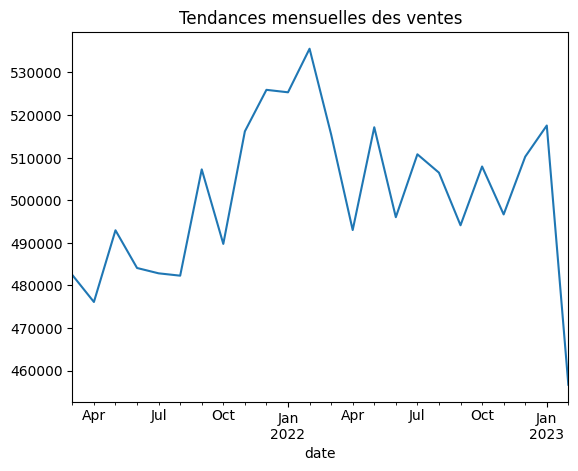

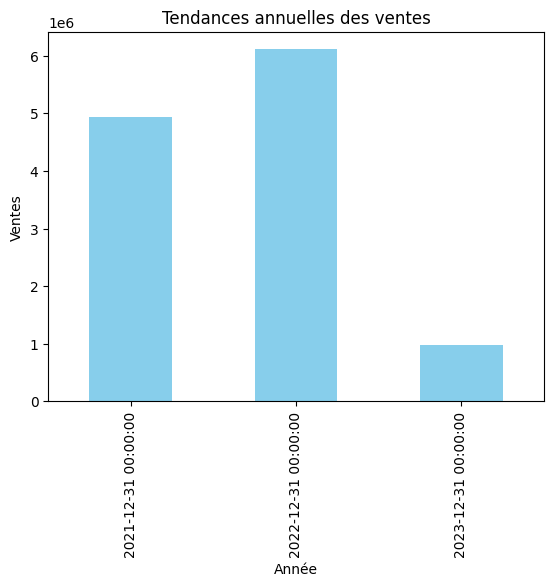

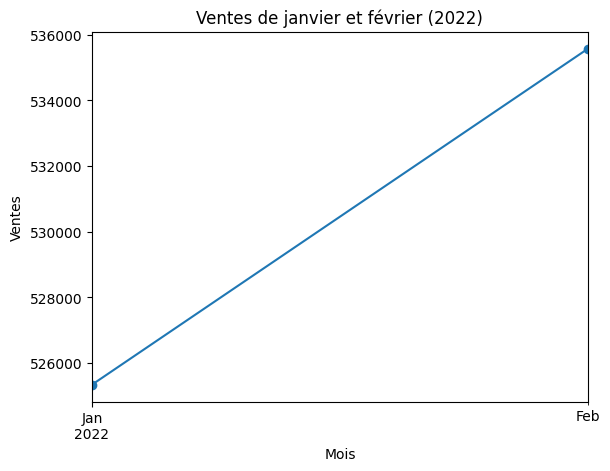

Produits les plus vendus :


id_prod
2_159    94893.50
2_135    69334.95
2_112    65407.76
2_102    60736.78
2_209    56971.86
Name: price, dtype: float64

In [64]:

# Convertir la colonne de date en datetime en traitant les erreurs
prod_transactions['date'] = pd.to_datetime(prod_transactions['date'], errors='coerce')

# Tendances mensuelles en ignorant les valeurs manquantes
ventes_mensuelles = prod_transactions.resample('M', on='date')['price'].sum()
ventes_mensuelles.plot(title='Tendances mensuelles des ventes')
plt.show()

# Tendances annuelles en ignorant les valeurs manquantes
ventes_annuelles = prod_transactions.resample('Y', on='date')['price'].sum()
ventes_annuelles.plot(kind='bar', title='Tendances annuelles des ventes', color='skyblue')
plt.xlabel('Année')
plt.ylabel('Ventes')
plt.show()

# Graphique courbe du total des ventes mensuelles de janvier et février (2021-2022)
ventes_jan_feb = prod_transactions[(prod_transactions['date'].dt.month.isin([1, 2])) & (prod_transactions['date'].dt.year.isin([2021, 2022]))]
ventes_mensuelles_jan_feb = ventes_jan_feb.resample('M', on='date')['price'].sum()
ventes_mensuelles_jan_feb.plot(title='Ventes de janvier et février (2022)', marker='o')
plt.xlabel('Mois')
plt.ylabel('Ventes')
plt.show()

# Produits les plus vendus
produits_plus_vendus = prod_transactions.groupby('id_prod')['price'].sum().sort_values(ascending=False)
print("Produits les plus vendus :")
display(produits_plus_vendus.head())


<span style="color:darkorange; font-weight:bold;">Analyse préliminaire des ventes:</span>

**Tendance des ventes mensuelles:**

- <span style="color:darkorange;"> Entre avril et juillet 2021, une croissance constante des ventes a été observée, atteignant un pic de 490 000.</span>

- <span style="color:darkorange;"> De juillet à octobre 2021, une augmentation a été enregistrée, approchant les 500 000 et se rapprochant davantage de 510 000.</span>

- <span style="color:darkorange;"> La période d'octobre 2021 à janvier 2022 a connu une croissance continue, passant de 510 000 à 530 000, pour ensuite redescendre vers avril 2022.</span>

<span style="color:darkorange;">Par la suite, des pics ont été observés en avril, juillet et octobre 2022, fluctuant entre 510 000 et 490 000. Une tendance se dégage avec des baisses des ventes tous les deux mois, manifestant des variations entre 490 000 et 510 000 de janvier 2022 à octobre 2022.</span>

<span style="color:darkorange;">Il est important de noter que pour la période de 2021, les variations des ventes ont été plus significatives, s'étendant de 480 000 à 490 000 lors des baisses. </span>


**Interprétation des ventes mensuelles:**

- <span style="color:darkorange;">La tendance mensuelle révele des variations saisonnières dans les ventes. Les périodes d'augmentation sont suivies de pics réguliers tous les deux mois, avec des baisses marquées mais relativement stable. Les variations plus prononcées en 2021 suggèrent une dynamique différente par rapport à 2022. Ces observations pourraient orienter des stratégies saisonnières de gestion des stocks et de promotion potentielles.</span>
<span style="color:darkorange;">Cette analyse temporelle devrait guider les décisions opérationnelles et stratégiques, en tenant compte de la durée totale des données pour une compréhension plus approfondie des tendances à long terme</span>

**Tendance des ventes anuelles:**

- <span style="color:darkorange;">En date du 31 décembre 2021, les ventes ont connu une croissance progressive, passant de 0 à 5 millions.</span>

- <span style="color:darkorange;"> Au 31 décembre 2022, les tendances de vente indiquent une augmentation, couvrant une fourchette de 0 à 6 millions.</span>

**Interprétation des ventes anuelles**

<span style="color:darkorange;">Les données révèlent une tendance à la hausse dans les ventes d'une année à l'autre. En 2021, la croissance a été significative, passant de zéro à cinq millions, tandis qu'en 2022, la tendance à la hausse s'est poursuivie, avec une fourchette élargie atteignant six millions. Ces informations suggèrent une dynamique positive dans les performances de vente sur la période observée.</span>

**Tendance des ventes des ventes de janvier et février 2021-2022:**

- <span style="color:darkorange;">Tendance croissante au fil du temps.</span>

- <span style="color:darkorange;"> Augmentation des performances des ventes pendant la période de janvier et février allant de 526 000 à 536 00 .</span>

**Interprétation des ventes anuelles**

<span style="color:darkorange;"> On remarque que les ventes ont progréssées de manière positive et cela pourrait indiquer une dynamique positive de l'activités commerciale.</span>

<span style="color:darkorange; font-weight:bold;">Conclusion générale des tendances globales des ventes:</span>

<span style="color:darkorange;"> On remarque que les ventes ont progressé de manière positive, indiquant une dynamique favorable de l'activité commerciale. Ces tendances, qu'elles soient mensuelles ou annuelles, offrent des insights importants pour la planification stratégique, la gestion des stocks et les efforts de promotion. Il est crucial de prendre en compte ces variations saisonnières pour ajuster les stratégies opérationnelles et maximiser la croissance continue des ventes.</span>

<span style="color:darkorange;"> Il est attendu que nous observions une baisse significative des ventes au cours de l'année 2023, étant donné que les données s'arrêtent en février 2023.</span>

#### <span style="color: #87CEEB;">b.III)Vérifications des ventes mensuelles </span>

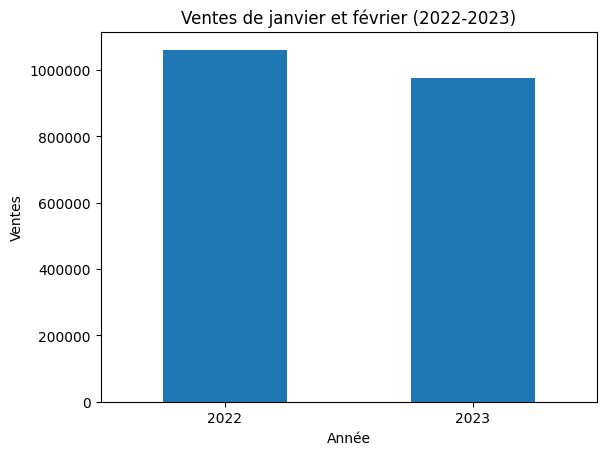

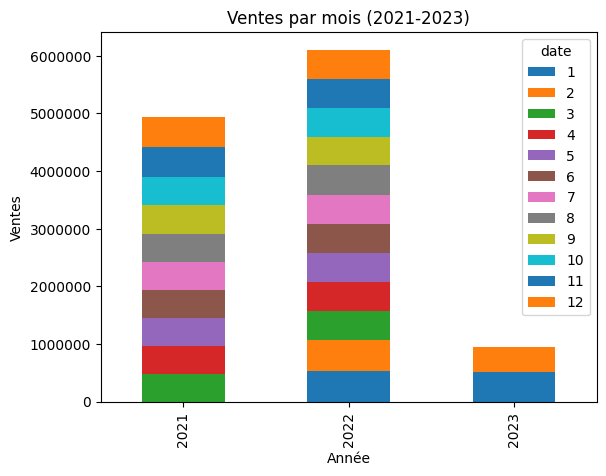

In [65]:

# Convertir la colonne de date en datetime en traitant les erreurs
prod_transactions['date'] = pd.to_datetime(prod_transactions['date'], errors='coerce')

# Filtrer les données pour les mois de janvier et février (2022, 2023)
ventes_jan_feb_2022_2023 = prod_transactions[
    (prod_transactions['date'].dt.month.isin([1, 2])) & 
    (prod_transactions['date'].dt.year.isin([2022, 2023]))
]

# Calculer le total des ventes pour chaque année
ventes_annees = ventes_jan_feb_2022_2023.groupby(ventes_jan_feb_2022_2023['date'].dt.year)['price'].sum()

# Formater les dates dans le format 'YYYY'
ventes_annees.index = ventes_annees.index.astype(str)

# Afficher le graphique à barres avec l'année 2021 incluse et notation non scientifique sur l'axe y
ax = ventes_annees.plot(kind='bar', title='Ventes de janvier et février (2022-2023)')
plt.xlabel('Année')
plt.ylabel('Ventes')

# Ajouter l'année 2021 à l'axe x
plt.xticks(rotation=0)

# Désactiver l'écriture scientifique sur l'axe y
ax.get_yaxis().get_major_formatter().set_scientific(False)

plt.show()

plt.show()


# Filtrer les données pour les mois de janvier et février (2021, 2022, 2023)
ventes_jan_feb_2021_2023 = prod_transactions[
    (prod_transactions['date'] >= '2021-01-01') & 
    (prod_transactions['date'] <= '2023-02-28')
]

# Créer un DataFrame avec un index multi-niveau
ventes_annees = ventes_jan_feb_2021_2023.groupby([ventes_jan_feb_2021_2023['date'].dt.year, ventes_jan_feb_2021_2023['date'].dt.month])['price'].sum().unstack()

# Remplir les valeurs manquantes avec 0 pour inclure toutes les années
ventes_annees = ventes_annees.reindex([2021, 2022, 2023], fill_value=0)

# Afficher le graphique à barres empilées
ax = ventes_annees.plot(kind='bar', stacked=True, title='Ventes par mois (2021-2023)')
plt.xlabel('Année')
plt.ylabel('Ventes')

# Désactiver l'écriture scientifique sur l'axe y
ax.get_yaxis().get_major_formatter().set_scientific(False)

plt.show()

1. <span style="color:darkorange;">Ventes de janvier à février 2021-2023 : Confirmation de la baisse significative des ventes au cours de l'année 2023 (les données s'arrêtent à février 2023).</span>

2. <span style="color:darkorange;">Ventes de janvier à février 2021-2023 : Confirmation de la variation saisonnière et des performances de ventes pour l'année 2022.</span>

#### <span style="color: #87CEEB;">c.III)Analyse Produits </span>

In [66]:
prod_transactions

,id_prod,price,categ,date,session_id,client_id
0,0_1421,19.99,0,2021-03-01 04:13:00.107748,s_101,c_8533
1,0_1421,19.99,0,2021-03-01 13:48:20.214075,s_285,c_5299
2,0_1421,19.99,0,2021-03-01 15:07:42.730079,s_317,c_8024
3,0_1421,19.99,0,2021-03-02 03:39:21.811833,s_563,c_7702
4,0_1421,19.99,0,2021-03-02 19:09:41.789425,s_850,c_4057
...,...,...,...,...,...,...
687529,1_140,38.56,1,2022-12-09 14:20:34.169187,s_309513,c_7406
687530,0_1920,25.16,0,2021-04-13 18:36:10.252971,s_20115,c_7088
687531,0_1920,25.16,0,2021-05-30 02:37:22.371278,s_41465,c_7748
687532,0_1920,25.16,0,2022-12-30 02:37:22.371278,s_319303,c_7748


__Test K2 et Shapiro :__ Analyse des prix

- K2: Evolution de la normalité, vérification de la distribution des données, aide à comprendre les variations.

- Shapiro : varaibilité de la distribution normale.

In [67]:
from scipy.stats import normaltest

# Effectuer le test K2 sur les prix 
statistic, p_value = normaltest(prod_transactions['price'])

# Afficher les résultats du test
print("Statistique du test K2:", statistic)
print("P-valeur du test K2:", p_value)

# Interpréter les résultats
alpha = 0.05
if p_value < alpha:
    print("La variable ne suit probablement pas une distribution normale.")
else:
    print("La variable suit probablement une distribution normale.")


Statistique du test K2: 729843.8608912486
P-valeur du test K2: 0.0
La variable ne suit probablement pas une distribution normale.


1. <span style="color:darkorange;">- Valeur du test élevée, la p-valeur est proche de 0.</span>

2. <span style="color:darkorange;">- Les données ne suivent pas une distribution normale.</span>

3. <span style="color:darkorange;">-Hétérogénéité dans la distribution des prix et variations significatives dans les valeurs de celui-ci</span>


<span style="color:darkorange;">On peut conclure que la distribution des prix ne suit probablement pas une distribution normale. La p-valeur très basse suggère une divergence significative par rapport à la normalité, et la statistique du test K2 élevée confirme cette divergence.</span>

In [68]:
from scipy.stats import shapiro

# Effectuer le test de Shapiro-Wilk sur la variable continue (par exemple, le prix)
statistic, p_value = shapiro(prod_transactions['price'])

# Afficher les résultats du test
print("Statistique du test de Shapiro-Wilk:", statistic)
print("P-valeur du test de Shapiro-Wilk:", p_value)

# Interpréter les résultats
alpha = 0.05
if p_value < alpha:
    print("La variable ne suit probablement pas une distribution normale.")
else:
    print("La variable suit probablement une distribution normale.")


Statistique du test de Shapiro-Wilk: 0.5493592023849487
P-valeur du test de Shapiro-Wilk: 0.0
La variable ne suit probablement pas une distribution normale.


c:\Users\Rorsharks\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


1. <span style="color:darkorange;">- La p-valeur est associé à 0.</span>

2. <span style="color:darkorange;">- Confirmation que les données ne suivent pas une distribution normale.</span>

<span style="color:darkorange;">Le test de Shapiro-Wilk confirment également que la distribution des prix ne suit probablement pas une distribution normale. La p-valeur très basse suggère une divergence significative par rapport à la normalité.</span>

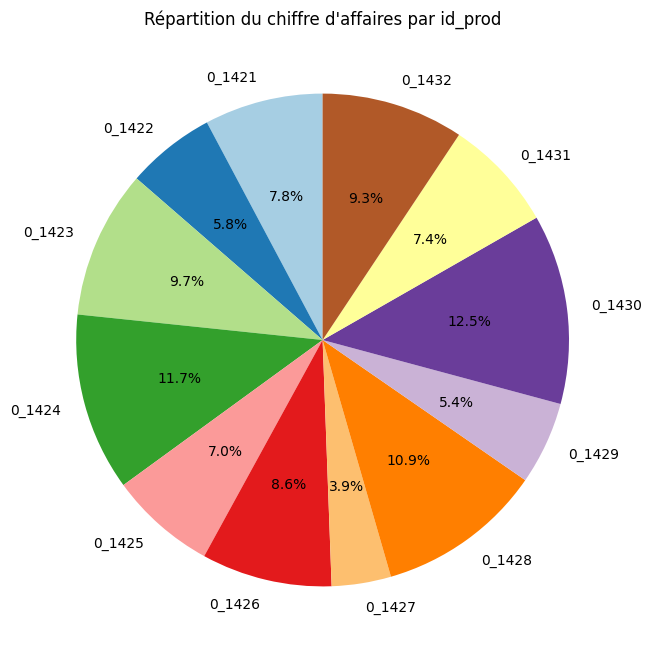

In [69]:
# Création d'un DataFrame fictif avec une colonne de date, de prix et d'id_prod
data = {'date': ['2021-01-01', '2021-02-01', '2021-03-01', '2022-01-01', '2022-02-01', '2021-01-01',
                 '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01'],
        'price': [20.0, 15.0, 25.0, 30.0, 18.0, 22.0, 10.0, 28.0, 14.0, 32.0, 19.0, 24.0]}

prod_transaction = pd.DataFrame(data)
prod_transaction['date'] = pd.to_datetime(prod_transaction['date'])  # Conversion de la chaîne en objet de date

# Ajouter une colonne "id_prod" avec des identifiants uniques au format "0_1421", "0_1422", etc.
prod_transaction['id_prod'] = ['0_' + str(i) for i in range(1421, 1421 + len(prod_transaction))]

# Calculer le chiffre d'affaires par id_prod
revenue_by_id_prod = prod_transaction.groupby('id_prod')['price'].sum()

# Récupérer les étiquettes dynamiquement
labels = revenue_by_id_prod.index

# Calculer les pourcentages par rapport au chiffre d'affaires total
percentages = revenue_by_id_prod / revenue_by_id_prod.sum() * 100

# Tracer le diagramme circulaire 
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired(range(len(labels))))
plt.title('Répartition du chiffre d\'affaires par id_prod')
plt.show()


**Répartion du chiffre d'affaire par id_prod:**

<span style="color:darkorange;">Les id_prod révèlent des variations notables, s'étendant de 3.9% à 12.5%. Certains produits se démarquent de manière significative, tels que le produit 0-1430 représentant 12.5% du chiffre d'affaires, suivi du 0-1424 avec 11.7%, et du 0-1428 avec 10.9%. 
<span style="color:darkorange;">Les autres id_prod affichent des proportions situées entre 5% et 9%, tandis que ceux générant moins de chiffre d'affaires comprennent le 0-1422 et le 0-1430 avec respectivement 5.8% et 5.4%, ainsi que le 0-1427 avec 3.9%.</span>

**Interprétation :**

<span style="color:darkorange;">L'observation de la répartition du chiffre d'affaires par id_prod met en lumière des disparités significatives entre les produits. Certains articles, tels que le 0-1430, le 0-1424 et le 0-1428, jouent un rôle prédominant en contribuant fortement au chiffre d'affaires global, représentant ensemble plus de 35% du total. En revanche, d'autres produits, comme le 0-1422, le 0-1430 et le 0-1427, ont une contribution plus modeste, représentant moins de 10% du chiffre d'affaires. Cette analyse permet d'identifier les produits clés qui impactent positivement les performances financières, fournissant ainsi des informations utiles pour les décisions stratégiques et la gestion des stocks.</span>

In [70]:
#Tops et Flops, répartiion par catégorie
# Produits les plus vendus
top_produits = prod_transactions.groupby('id_prod')['price'].sum().sort_values(ascending=False)
print("Produits les plus vendus :")
display(top_produits.head())

# Produits les moins vendus (flops)
flop_produits = prod_transactions.groupby('id_prod')['price'].sum().sort_values(ascending=True)
print("Produits les moins vendus (flops) :")
display(flop_produits.head())

# Répartition par catégorie
repartition_par_categorie = prod_transactions.groupby('categ')['price'].sum()
print("Répartition par catégorie :")
display(repartition_par_categorie)


Produits les plus vendus :


id_prod
2_159    94893.50
2_135    69334.95
2_112    65407.76
2_102    60736.78
2_209    56971.86
Name: price, dtype: float64

Produits les moins vendus (flops) :


id_prod
0_1539    0.99
0_1284    1.38
0_1653    1.98
0_541     1.99
0_1601    1.99
Name: price, dtype: float64

Répartition par catégorie :


categ
0    4419730.97
1    4827657.11
2    2780275.02
Name: price, dtype: float64

<span style="color:darkorange;">Les produits les plus vendus, tels que 2_159, 2_135, et 2_112, génèrent des revenus considérables, avec des chiffres atteignant jusqu'à 94 893.50 €. En revanche, les produits moins performants (flops), comme 0_1539 et 0_1284, ont des ventes nettement plus modestes, ne dépassant pas 1.99 €.</span>

<span style="color:darkorange;">La répartition par catégorie indique que la catégorie 1 contribue le plus au chiffre d'affaires total, avec un montant de 4 827 657.11 €, suivie de près par la catégorie 0 avec 4 419 730.97 €. La catégorie 2 contribue également significativement, mais avec un montant inférieur, s'élevant à 2 780 275.02 €.</span>

**Conclusion :**

<span style="color:darkorange;">Les produits les plus vendus jouent un rôle crucial dans la génération de revenus, tandis que les produits moins performants ont une contribution modeste. La catégorie 1 est le principal moteur du chiffre d'affaires total, indiquant l'importance stratégique de cette catégorie dans la planification des ventes et la gestion des stocks. Une focalisation sur les produits phares de la catégorie 1 pourrait être bénéfique pour maximiser les profits, tandis que des stratégies d'amélioration ou de promotion peuvent être envisagées pour les produits moins performants.</span>

In [71]:
# Tops et Flops, répartition par catégorie
# Produits les plus vendus
top_produits = prod_transactions.groupby('id_prod')['price'].sum().sort_values(ascending=False)
print("Top 10 des produits les plus vendus :")
display(top_produits.head(10))

# Produits les moins vendus (flops)
flop_produits = prod_transactions.groupby('id_prod')['price'].sum().sort_values(ascending=True)
print("Top 10 des produits les moins vendus (flops) :")
display(flop_produits.head(10))

# Répartition par catégorie
repartition_par_categorie = prod_transactions.groupby('categ')['price'].sum()
print("Répartition par catégorie :")
display(repartition_par_categorie)

Top 10 des produits les plus vendus :


id_prod
2_159    94893.50
2_135    69334.95
2_112    65407.76
2_102    60736.78
2_209    56971.86
1_395    56617.47
1_369    56136.60
2_110    53846.25
1_383    53834.43
1_414    53522.18
Name: price, dtype: float64

Top 10 des produits les moins vendus (flops) :


id_prod
0_1539    0.99
0_1284    1.38
0_1653    1.98
0_541     1.99
0_1601    1.99
0_807     1.99
0_1728    2.27
0_1498    2.48
0_898     2.54
0_1840    2.56
Name: price, dtype: float64

Répartition par catégorie :


categ
0    4419730.97
1    4827657.11
2    2780275.02
Name: price, dtype: float64

1<span style="color:darkorange;">- Le chiffre d'affaires par produit indiquent des variations significatives, avec des produits tels que 0-1430 (12.5%) et 0-1424 (11.7%) se démarquant, tandis que d'autres produits sont généralement compris entre 5 et 9%.</span>

2.<span style="color:darkorange;"> **Produits les plus vendus :**
<span style="color:darkorange;">- Les produits les plus vendus, tels que 2_159, 2_135 et 2_112, ont généré des revenus considérables, atteignant jusqu'à 94 893.50 €, soulignant leur importance dans la génération de chiffre d'affaires.</span>

3.<span style="color:darkorange;">**Produits moins vendus (flops) :**
<span style="color:darkorange;"> - Certains produits, tels que 0_1539, 0_1284 et 0_1653, ont des performances de vente modestes, avec des prix compris entre 0.99 € et 1.99 €.</span>

4.<span style="color:darkorange;">**Répartition par Catégorie :**
<span style="color:darkorange;">- La catégorie 1 contribue le plus au chiffre d'affaires total, suivie de près par la catégorie 0. La catégorie 2 contribue également significativement, bien que de manière moins importante.</span>

**Conclusion :**

<span style="color:darkorange;">La diversité des performances des produits souligne l'importance d'analyser les ventes par produit et par catégorie. Les produits les plus performants peuvent bénéficier d'une attention particulière en termes de marketing et de promotion, tandis que des stratégies d'amélioration peuvent être envisagées pour les produits moins performants. La concentration sur les catégories 0 et 1 peut être une approche stratégique pour maximiser le chiffre d'affaires total.</span>


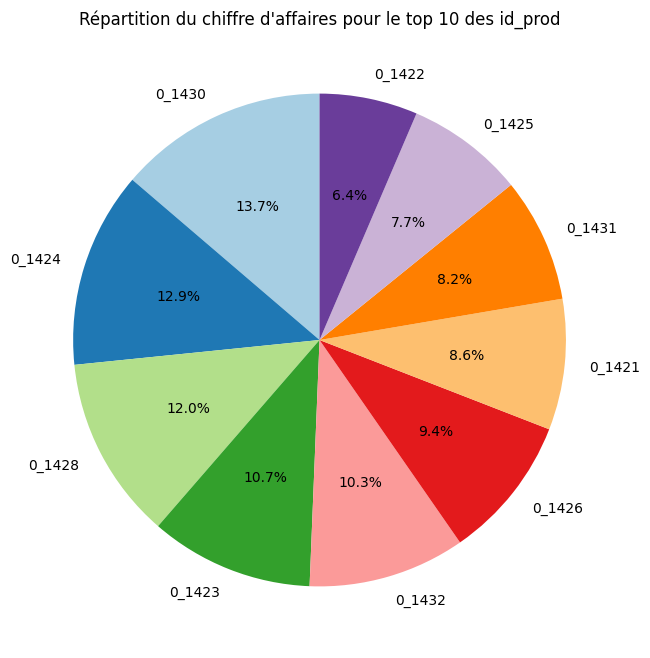

In [72]:

# Exemple de création d'un DataFrame fictif avec une colonne de date, de prix et d'id_prod
data = {'date': ['2021-01-01', '2021-02-01', '2021-03-01', '2022-01-01', '2022-02-01', '2021-01-01',
                 '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01'],
        'price': [20.0, 15.0, 25.0, 30.0, 18.0, 22.0, 10.0, 28.0, 14.0, 32.0, 19.0, 24.0]}

prod_transaction = pd.DataFrame(data)
prod_transaction['date'] = pd.to_datetime(prod_transaction['date'])  # Conversion de la chaîne en objet de date

# Ajouter une colonne "id_prod" avec des identifiants uniques au format "0_1421", "0_1422", etc.
prod_transaction['id_prod'] = ['0_' + str(i) for i in range(1421, 1421 + len(prod_transaction))]

# Calculer le chiffre d'affaires par id_prod
revenue_by_id_prod = prod_transaction.groupby('id_prod')['price'].sum()

# Sélectionner le top 10 des id_prod
top_10_id_prod = revenue_by_id_prod.nlargest(10)

# Récupérer les étiquettes dynamiquement
labels = top_10_id_prod.index

# Calculer les pourcentages par rapport au chiffre d'affaires total
percentages = top_10_id_prod / top_10_id_prod.sum() * 100

# Tracer le diagramme circulaire
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired(range(len(labels))))
plt.title('Répartition du chiffre d\'affaires pour le top 10 des id_prod')
plt.show()


<span style="color:darkorange;">**Répartition du Chiffre d'Affaires par ID-Prod :**</span>

<span style="color:darkorange;">Des fluctuations sont observées dans la distribution du chiffre d'affaires, s'étalant de 6.4% à 13.7%. Trois produits se démarquent dans le top 10, notamment le 0-1430 avec 13.4%, le 0-1424 avec 12.9%, et le 0-1428 avec 12%. Les autres ID-Prod enregistrent des pourcentages compris entre 6.4% et 9.4% du chiffre d'affaires total.</span>

1. <span style="color:darkorange;">**Performances des Top 3 Produits :**</span>
   - <span style="color:darkorange;">Les produits 0-1430, 0-1424, et 0-1428 dominent la répartition, représentant des parts significatives du chiffre d'affaires total.</span>

2. <span style="color:darkorange;">**Variabilité des Autres Produits :**</span>
   -<span style="color:darkorange;"> Les autres ID-Prod affichent des performances modérées, avec des parts comprises entre 6.4% et 9.4%, indiquant une diversité dans la contribution au chiffre d'affaires.</span>

**Conclusion :**

<span style="color:darkorange;">L'analyse de la répartition du chiffre d'affaires met en évidence la concentration de performances élevées dans quelques produits spécifiques. Il peut être bénéfique d'approfondir la stratégie de marketing et de promotion pour les produits phares, tout en examinant des opportunités d'amélioration pour les autres produits afin d'optimiser globalement le chiffre d'affaires.</span>



 <span style="color:blue; font-weight:bold; font-size:2em;">IV] Analyse clients par produits </span>

#### <span style="color: #87CEEB;">a.IV)Analyse du chiffre d'affaire des clients </span>

In [73]:
# Tops et Flops par client
# Chiffre d'affaires par client
ca_par_client = prod_transactions.groupby('client_id')['price'].sum().sort_values(ascending=False)
print("Top 10 des clients avec le plus de chiffre d'affaires :")
print(ca_par_client.head(10))

# Top 10 des clients avec le moins de chiffre d'affaires (flops)
flop_clients = prod_transactions.groupby('client_id')['price'].sum().sort_values(ascending=True)
print("Top 10 des clients avec le moins de chiffre d'affaires (flops) :")
print(flop_clients.head(10))

Top 10 des clients avec le plus de chiffre d'affaires :
client_id
c_1609    326039.89
c_4958    290227.03
c_6714    153918.60
c_3454    114110.57
c_1570      5285.82
c_3263      5276.87
c_2140      5260.18
c_2899      5214.05
c_7319      5155.77
c_7959      5135.75
Name: price, dtype: float64
Top 10 des clients avec le moins de chiffre d'affaires (flops) :
client_id
c_8351     6.31
c_8140     8.30
c_8114     9.98
c_4648    11.20
c_4478    13.36
c_6040    15.72
c_5919    15.98
c_5829    16.07
c_8032    17.64
c_4976    17.89
Name: price, dtype: float64


<span style="color:darkorange;">**Observations :**</span>

- <span style="color:darkorange;">Les clients c_1609 et c_4958 sont nettement en tête en termes de chiffre d'affaires, dépassant significativement les autres clients.</span>
- <span style="color:darkorange;">Certains clients, tels que c_1570, c_3263, et c_2140, ont des chiffres d'affaires relativement modestes comparés aux leaders du top 10.</span>

**Recommandations :**

- <span style="color:darkorange;">Il serait judicieux de concentrer davantage les efforts de fidélisation et de satisfaction client sur les clients les plus performants pour maximiser leur contribution au chiffre d'affaires.
- <span style="color:darkorange;">Pour les clients avec des chiffres d'affaires plus modestes, des stratégies de promotion et d'engagement peuvent être explorées pour stimuler leurs achats et accroître leur valeur.</span>

<span style="color:darkorange;">L'analyse de la répartition du chiffre d'affaires met en évidence la concentration de performances élevées dans quelques produits spécifiques. Il peut être bénéfique d'approfondir la stratégie de marketing et de promotion pour les produits phares, tout en examinant des opportunités d'amélioration pour les autres produits afin d'optimiser globalement le chiffre d'affaires.</span>


In [74]:
# Chiffre d'affaires par client
ca_par_client = transac_customers.groupby('client_id')['price'].sum().sort_values(ascending=False)

# Afficher la somme du chiffre d'affaires par client_id
print("Somme du chiffre d'affaires par client_id :")
print(ca_par_client)

Somme du chiffre d'affaires par client_id :
client_id
c_1609    326039.89
c_4958    290227.03
c_6714    153918.60
c_3454    114110.57
c_1570      5285.82
            ...    
c_4478        13.36
c_4648        11.20
c_8114         9.98
c_8140         8.30
c_8351         6.31
Name: price, Length: 8600, dtype: float64


**<span style="color:darkorange;">Analyse de la Somme du Chiffre d'Affaires par Client :** </span>

<span style="color:darkorange;">La somme du chiffre d'affaires par client révèle des disparités significatives entre les différents clients. </span>

- <span style="color:darkorange;"> Les quatre principaux contributeurs au chiffre d'affaires sont :</span>

  1.<span style="color:darkorange;">**c_1609 - 326039.89** </span>

  2.<span style="color:darkorange;"> **c_4958 - 290227.03** </span>

  3.<span style="color:darkorange;"> **c_6714 - 153918.60** </span>
  
  4.<span style="color:darkorange;"> **c_3454 - 114110.57** </span>

- <span style="color:darkorange;">D'autres clients, tels que c_1570 avec un chiffre d'affaires de 5285.82, ont également une contribution notable.</span>

- <span style="color:darkorange;">D'autre part, un groupe de clients, dont les c_4478, c_4648, c_8114, c_8140, et c_8351, a une contribution au chiffre d'affaires relativement faible.</span>

**Recommandations :**

- <span style="color:darkorange;">Les efforts de fidélisation et de gestion de la relation client peuvent être intensifiés pour les clients à fort chiffre d'affaires, en cherchant à maintenir leur satisfaction et à stimuler davantage d'achats.</span>

- <span style="color:darkorange;">Pour les clients avec des chiffres d'affaires plus modestes, des initiatives de promotion, de personnalisation ou de programmes de fidélité peuvent être envisagées pour augmenter leur engagement et stimuler leurs dépenses.</span>

- <span style="color:darkorange;">Une segmentation plus approfondie des clients en fonction de leurs comportements d'achat et de leurs préférences peut aider à adapter des stratégies marketing plus ciblées et efficaces.</span>

<span style="color:darkorange;">L'analyse de la répartition du chiffre d'affaires met en évidence la concentration de performances élevées dans quelques produits spécifiques. Il peut être bénéfique d'approfondir la stratégie de marketing et de promotion pour les produits phares, tout en examinant des opportunités d'amélioration pour les autres produits afin d'optimiser globalement le chiffre d'affaires.</span>

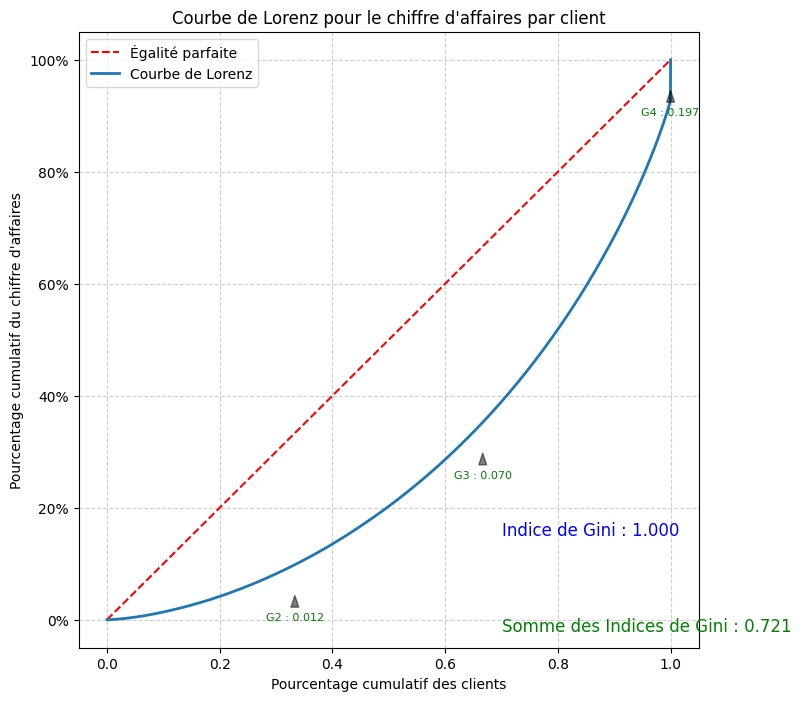

In [75]:
# Chiffre d'affaires par client
ca_par_client = transac_customers.groupby('client_id')['price'].sum().sort_values(ascending=False)

# Calculer la courbe de Lorenz
n = len(ca_par_client)
lorenz_curve = np.cumsum(np.sort(ca_par_client)) / np.sum(ca_par_client)

# Diviser la courbe de Lorenz en trois parties égales
thirds = np.linspace(0, 1, 4)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Assurez-vous de définir correctement transac_customers avant cette étape
# transac_customers = ...

# Chiffre d'affaires par client
ca_par_client = transac_customers.groupby('client_id')['price'].sum().sort_values(ascending=False)

# Calculer la courbe de Lorenz
n = len(ca_par_client)
lorenz_curve = np.cumsum(np.sort(ca_par_client)) / np.sum(ca_par_client)

# Diviser la courbe de Lorenz en trois parties égales
thirds = np.linspace(0, 1, 4)

# Initialiser les indices de Gini pour chaque partie
gini_areas = []

# Calculer l'aire sous la courbe de Lorenz pour chaque partie
for i in range(3):
    start = int(thirds[i] * (n-1))
    end = int(thirds[i + 1] * (n-1)) + 1
    gini_area = np.trapz(lorenz_curve[start:end], np.linspace(thirds[i], thirds[i + 1], end - start))
    gini_areas.append(gini_area)

# Calculer l'indice de Gini global
gini_index = 1 - 2 * np.trapz(lorenz_curve, np.linspace(0, 1, n)) / n

# Calculer la somme des indices de Gini
sum_gini = np.sum(2 * (np.arange(1, n + 1) - 0.5) / n - lorenz_curve) / n

# Afficher la courbe de Lorenz
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot([0, 1], [0, 1], linestyle='--', color='red', label='Égalité parfaite')
ax.plot(np.linspace(0, 1, n), lorenz_curve, linewidth=2, label='Courbe de Lorenz')
ax.set_title('Courbe de Lorenz pour le chiffre d\'affaires par client')
ax.set_xlabel('Pourcentage cumulatif des clients')
ax.set_ylabel('Pourcentage cumulatif du chiffre d\'affaires')
ax.legend()

# Ajouter des lignes de grille
ax.grid(True, linestyle='--', alpha=0.6)

# Afficher l'indice de Gini
ax.text(0.7, 0.15, f'Indice de Gini : {gini_index:.3f}', fontsize=12, color='blue')

# Définir des positions spécifiques pour les annotations
annotation_positions = thirds[1:]  # Positions au début de chaque tier, sauf le premier

# Afficher les indices de Gini pour chaque partie
for i, gini_area in enumerate(gini_areas):
    position = annotation_positions[i]
    index_position = int(position * (n-1))
    ax.annotate(f'G{i + 2} : {gini_area:.3f}', xy=(position, lorenz_curve[index_position] - 0.05),
                 xytext=(position, lorenz_curve[index_position] - 0.1), ha='center',
                 arrowprops=dict(facecolor='black', arrowstyle='wedge,tail_width=0.7', alpha=0.5),
                 fontsize=8, color='green')

# Afficher la somme des indices de Gini
ax.text(0.7, 0.1 - (len(gini_areas) + 1) * 0.03, f'Somme des Indices de Gini : {sum_gini:.3f}', fontsize=12, color='green')

# Définir une fonction de formatage personnalisée pour afficher les pourcentages
def percentage_formatter(x, pos):
    return f'{int(x*100)}%'

# Appliquer la fonction de formatage personnalisée à l'axe y
ax.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))

plt.show()


In [76]:
# Vérification de l'indice de Gini
n = len(ca_par_client)

# Vérification des trois aires sous la courbe de Lorenz
for i, gini_area in enumerate(gini_areas):
    print(f'Aire sous la Courbe de Lorenz - Partie {i + 1} : {gini_area:.3f}')

# Vérification de la somme des indices de Gini
sum_gini_perfect = 0.000  # Pour une distribution parfaitement égalitaire, la somme est 0
print(f'Somme des Indices de Gini calculée : {sum_gini:.3f}')

Aire sous la Courbe de Lorenz - Partie 1 : 0.012
Aire sous la Courbe de Lorenz - Partie 2 : 0.070
Aire sous la Courbe de Lorenz - Partie 3 : 0.197
Somme des Indices de Gini calculée : 0.721


**Courbe de Lorenz**

1. <span style="color:darkorange;">**Outil Graphique en Statistique et Économie**</span>

   <span style="color:darkorange;">La Courbe de Lorenz est un <span style="color:darkorange;">**outil graphique largement utilisé en statistique et en économie**</span>. Elle offre une représentation visuelle de la répartition des revenus ou du chiffre d'affaires au sein d'une population.</span>

2. <span style="color:darkorange;">**Représentation des Inégalités du Chiffre d'Affaires des Clients**</span>

   <span style="color:darkorange;">La Courbe de Lorenz représente les inégalités dans la distribution du chiffre d'affaires des clients. Elle offre un aperçu visuel de la concentration des revenus, montrant comment différents segments de la population contribuent au chiffre d'affaires total.</span>

   - <span style="color:darkorange;">**Pourcentage Cumulatif des Clients :**</span> <span style="color:darkorange;"> La courbe commence à 0.0 sur l'axe horizontal et atteint 1.0 à l'extrémité droite. Chaque point sur l'axe X représente un pourcentage cumulatif (en décimales) de clients, triés par ordre croissant de leur contribution au chiffre d'affaires.</span>

   - <span style="color:darkorange;">**Pourcentage Cumulatif du Chiffre d'Affaires :**</span> <span style="color:darkorange;">L'axe vertical représente le pourcentage cumulatif (en décimales) du chiffre d'affaires total. La courbe s'élève progressivement à mesure que les clients sont ajoutés, atteignant 1.0 à l'extrémité supérieure droite.</span>

<span style="color:darkorange;">**Aires sous les Différentes Parties de la Courbe de Lorenz**</span>

<span style="color:darkorange;">Les aires sous les différentes parties de la Courbe de Lorenz (0.012, 0.070, 0.197) décrivent la concentration relative des revenus ou du chiffre d'affaires dans ces segments spécifiques. Plus l'aire est grande, plus la concentration est élevée dans cette partie des clients.</span>

<span style="color:darkorange;">**Somme des Indices de Gini Calculée : 0.721**</span>

<span style="color:darkorange;">La somme totale des indices de Gini (0.721) indique l'inégalité globale dans l'ensemble des clients, en tenant compte de la distribution des revenus pour toutes les tranches. Un indice de Gini élevé, tel que celui-ci à 0.721, suggère une répartition très inégale du chiffre d'affaires parmi les clients.</span>

<span style="color:darkorange;">On remarque une répartition totalement inégale, car notre indice de Gini est à 0.721, indiquant une concentration importante du chiffre d'affaires chez un petit nombre de clients.</span>


 <span style="color:blue; font-weight:bold; font-size:2em;">V] Analyse temporelle </span>

#### <span style="color: #87CEEB;">a.V)Analyse commerciale temporelle </span>

In [77]:
# Analyse commerciale 2021-2022

# Conversion de la colonne 'date' en format datetime
transac_customers['date'] = pd.to_datetime(transac_customers['date'], errors='coerce')

# Supprimez les valeurs nulles après la conversion
transac_customers = transac_customers.dropna(subset=['date'])

# Assurez-vous que l'heure est dans la plage de 0 à 23 en utilisant .loc
transac_customers.loc[:, 'heure'] = transac_customers['date'].dt.hour % 24

# Groupez par heure et comptez le nombre de sessions (achats) pour chaque heure
achats_par_heure = transac_customers.groupby('heure')['session_id'].count()

# Affichez les résultats
print("Achats par heure :")
print(achats_par_heure)

# Trouvez l'heure avec le plus d'achats
heure_max_achats = achats_par_heure.idxmax()
nb_max_achats = achats_par_heure.max()
print(f"Heure avec le plus d'achats : {heure_max_achats}h avec {nb_max_achats} achats")


#Calculer la moyenne nbr achats 
# Groupez par heure et comptez le nombre de sessions (achats) pour chaque heure
achats_par_heure = transac_customers.groupby('heure')['session_id'].count()

# Calculez la moyenne des achats par heure
moyenne_achats_par_heure = round(achats_par_heure.mean(), 2)

# Affichez les résultats
print("Moyenne des achats par heure :")
print(moyenne_achats_par_heure)



Achats par heure :
heure
0     28218
1     28552
2     28855
3     28310
4     28310
5     28149
6     28648
7     28465
8     28899
9     29191
10    28629
11    28909
12    28920
13    28512
14    28626
15    28373
16    28364
17    28742
18    28788
19    29088
20    28693
21    28654
22    28498
23    28905
Name: session_id, dtype: int64
Heure avec le plus d'achats : 9h avec 29191 achats
Moyenne des achats par heure :
28637.42


<span style="color:darkorange;"> - On observe des variations dans le nombre d'achat au fil des heures avec une augmentation des achats à partir de 8h et un pic vers 19h00, puis denouveau une diminution. Les heures où nous avons des pics d'achat, c'est-à-dire de 9h-12h et de 18h-20h semblent correspondre aux heures de pointe avec des achats relativement plus élevés. </span>

<span style="color:darkorange;"> - On peut voir que à 5h et 16h les achats sont en diminutions et correspondent aux heures creuses. </span>

<span style="color:darkorange;"> - Globalement, les nombre d'achats semblant relativement stable au cours de la journée avec une moyenne par heure de 28 637.42€. </span>

In [78]:
# Filtrer les données pour l'année 2021
transac_customers_2021 = transac_customers[transac_customers['date'].dt.year == 2021].copy()

# Conversion de la colonne 'date' en format datetime
transac_customers_2021['date'] = pd.to_datetime(transac_customers_2021['date'], errors='coerce')

# Supprimez les valeurs nulles après la conversion
transac_customers_2021 = transac_customers_2021.dropna(subset=['date'])

# Assurez-vous que l'heure est dans la plage de 0 à 23 en utilisant .loc
transac_customers_2021.loc[:, 'heure'] = transac_customers_2021['date'].dt.hour % 24

# Groupez par heure et comptez le nombre de sessions (achats) pour chaque heure
achats_par_heure_2021 = transac_customers_2021.groupby('heure')['session_id'].count()

# Affichez les résultats
print("Achats par heure en 2021 :")
print(achats_par_heure_2021)

# Trouvez l'heure avec le plus d'achats
heure_max_achats_2021 = achats_par_heure_2021.idxmax()
nb_max_achats_2021 = achats_par_heure_2021.max()
print(f"Heure avec le plus d'achats en 2021 : {heure_max_achats_2021}h avec {nb_max_achats_2021} achats")


#Calculer la moyenne nbr achats 2021
# Groupez par heure et comptez le nombre de sessions (achats) pour chaque heure
achats_par_heure_2021 = transac_customers_2021.groupby('heure')['session_id'].count()

# Calculez la moyenne des achats par heure en 2021 et arrondissez à 2 décimales
moyenne_achats_par_heure_2021 = round(achats_par_heure_2021.mean(), 2)

# Affichez les résultats
print("Moyenne des achats par heure en 2021 :")
print(moyenne_achats_par_heure_2021)

Achats par heure en 2021 :
heure
0     11761
1     11943
2     12051
3     11807
4     11875
5     11840
6     11946
7     11973
8     11840
9     12085
10    11897
11    12115
12    11884
13    12013
14    12031
15    11734
16    11831
17    11963
18    11954
19    12070
20    11862
21    11890
22    11974
23    12096
Name: session_id, dtype: int64
Heure avec le plus d'achats en 2021 : 11h avec 12115 achats
Moyenne des achats par heure en 2021 :
11934.79


In [79]:
# Filtrer les données pour l'année 2022
transac_customers_2022 = transac_customers[transac_customers['date'].dt.year == 2022].copy()

# Conversion de la colonne 'date' en format datetime
transac_customers_2022['date'] = pd.to_datetime(transac_customers_2022['date'], errors='coerce')

# Supprimez les valeurs nulles après la conversion
transac_customers_2022 = transac_customers_2022.dropna(subset=['date'])

# Assurez-vous que l'heure est dans la plage de 0 à 23 en utilisant .loc
transac_customers_2022.loc[:, 'heure'] = transac_customers_2022['date'].dt.hour % 24

# Groupez par heure et comptez le nombre de sessions (achats) pour chaque heure
achats_par_heure_2022 = transac_customers_2022.groupby('heure')['session_id'].count()

# Affichez les résultats
print("Achats par heure en 2022 :")
print(achats_par_heure_2022)

# Trouvez l'heure avec le plus d'achats
heure_max_achats_2022 = achats_par_heure_2022.idxmax()
nb_max_achats_2022 = achats_par_heure_2022.max()
print(f"Heure avec le plus d'achats en 2022 : {heure_max_achats_2022}h avec {nb_max_achats_2022} achats")


#Calculer la moyenne nbr achats 2022
# Groupez par heure et comptez le nombre de sessions (achats) pour chaque heure
achats_par_heure_2022 = transac_customers_2022.groupby('heure')['session_id'].count()

# Calculez la moyenne des achats par heure en 2021 et arrondissez à 2 décimales
moyenne_achats_par_heure_2022 = round(achats_par_heure_2022.mean(), 2)

# Affichez les résultats
print("Moyenne des achats par heure en 2022 :")
print(moyenne_achats_par_heure_2022)


Achats par heure en 2022 :
heure
0     14188
1     14333
2     14451
3     14308
4     14185
5     14048
6     14389
7     14258
8     14684
9     14817
10    14488
11    14498
12    14756
13    14254
14    14317
15    14398
16    14328
17    14505
18    14547
19    14715
20    14573
21    14539
22    14270
23    14531
Name: session_id, dtype: int64
Heure avec le plus d'achats en 2022 : 9h avec 14817 achats
Moyenne des achats par heure en 2022 :
14432.5


<span style="color:darkorange;"> - On observe des variations légère dans le nombre d'achat en fonction des heures avec un pic à 9h. </span>

<span style="color:darkorange;"> - Distribution relativement uniforme des achats par heure, celle-ci est relativement stable au fil des heures. </span>

<span style="color:darkorange;"> - On remarque une régularité dans les habitudes d'achat pour 2022.

In [80]:
# Analyse commerciale; heures d'acahats 2021-2022
transac_customers['date'] = pd.to_datetime(transac_customers['date'], errors='coerce')

# Supprimez les valeurs nulles après la conversion
transac_customers = transac_customers.dropna(subset=['date'])

# Assurez-vous que l'heure est dans la plage de 0 à 23
transac_customers['heure'] = transac_customers['date'].dt.hour % 24

# Groupez par année et heure, et comptez le nombre de sessions (achats) pour chaque heure
achats_par_annee_heure = transac_customers.groupby([transac_customers['date'].dt.year, 'heure'])['session_id'].count()

# Trouvez l'heure avec le moins d'achats pour chaque année
heure_min_achats_2021 = achats_par_annee_heure[2021].idxmin()
nb_min_achats_2021 = achats_par_annee_heure[2021].min()
print(f"Heure avec le moins d'achats en 2021 : {heure_min_achats_2021}h avec {nb_min_achats_2021} achat(s)")

heure_min_achats_2022 = achats_par_annee_heure[2022].idxmin()
nb_min_achats_2022 = achats_par_annee_heure[2022].min()
print(f"Heure avec le moins d'achats en 2022 : {heure_min_achats_2022}h avec {nb_min_achats_2022} achat(s)")

# Calculez la moyenne des achats par heure pour chaque année
moyenne_achats_par_heure_2021 = round(achats_par_annee_heure[2021].mean(), 2)
moyenne_achats_par_heure_2022 = round(achats_par_annee_heure[2022].mean(), 2)

# Affichez les résultats
print("Moyenne des achats par heure en 2021 :", moyenne_achats_par_heure_2021)
print("Moyenne des achats par heure en 2022 :", moyenne_achats_par_heure_2022)


Heure avec le moins d'achats en 2021 : 15h avec 11734 achat(s)
Heure avec le moins d'achats en 2022 : 5h avec 14048 achat(s)
Moyenne des achats par heure en 2021 : 11934.79
Moyenne des achats par heure en 2022 : 14432.5


<span style="color:darkorange;"> - Une période d'activité en baisse se distingue entre 2021 et 2022. </span>

<span style="color:darkorange;"> - La moyenne d'achats par heure en 2021 est inférieure à celle de 2022, ce qui suggère une augmentation significative d'une année à l'autre, pouvant être attribuée à une croissance de la clientèle ou d'autres influences. </span>

<span style="color:darkorange;">- On observe une hausse des achats par heure d'une année à l'autre, avec des facteurs influençant la décision des habitudes d'achats.</span>

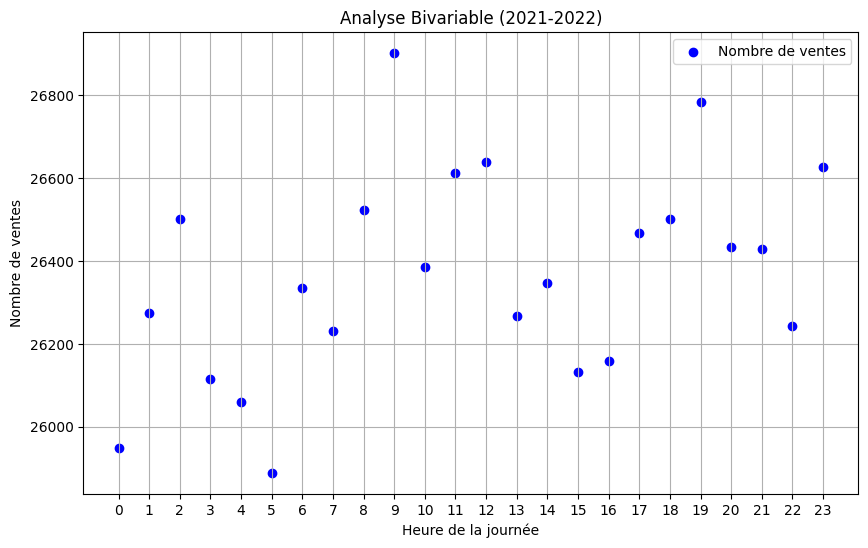

In [81]:
# Filtrer les données pour les années 2021-2022
transac_customers_2021_2022 = transac_customers[(transac_customers['date'].dt.year == 2021) | (transac_customers['date'].dt.year == 2022)]

# Groupez par heure et comptez le nombre de sessions (achats) pour chaque heure
achats_par_heure_2021_2022 = transac_customers_2021_2022.groupby('heure')['session_id'].count()

# Créez un nuage de points
plt.figure(figsize=(10, 6))
plt.scatter(achats_par_heure_2021_2022.index, achats_par_heure_2021_2022.values, color='blue', marker='o', label='Nombre de ventes')

plt.title('Analyse Bivariable (2021-2022)')
plt.xlabel('Heure de la journée')
plt.ylabel('Nombre de ventes')
plt.xticks(range(24))  
plt.legend()
plt.grid(True)
plt.show()

<span style="color:darkorange;"> - La répartition des décisions d'achat par heure demeure constante.</span>

<span style="color:darkorange;"> - Les points sont dispersés tout au long de la journée, sans concentration nette sur des heures spécifiques. </span>

<span style="color:darkorange;">- Des pics d'activité se manifestent aux heures de pointe.</span>

#### <span style="color: #87CEEB;">b.V)Décomposition mobile </span>

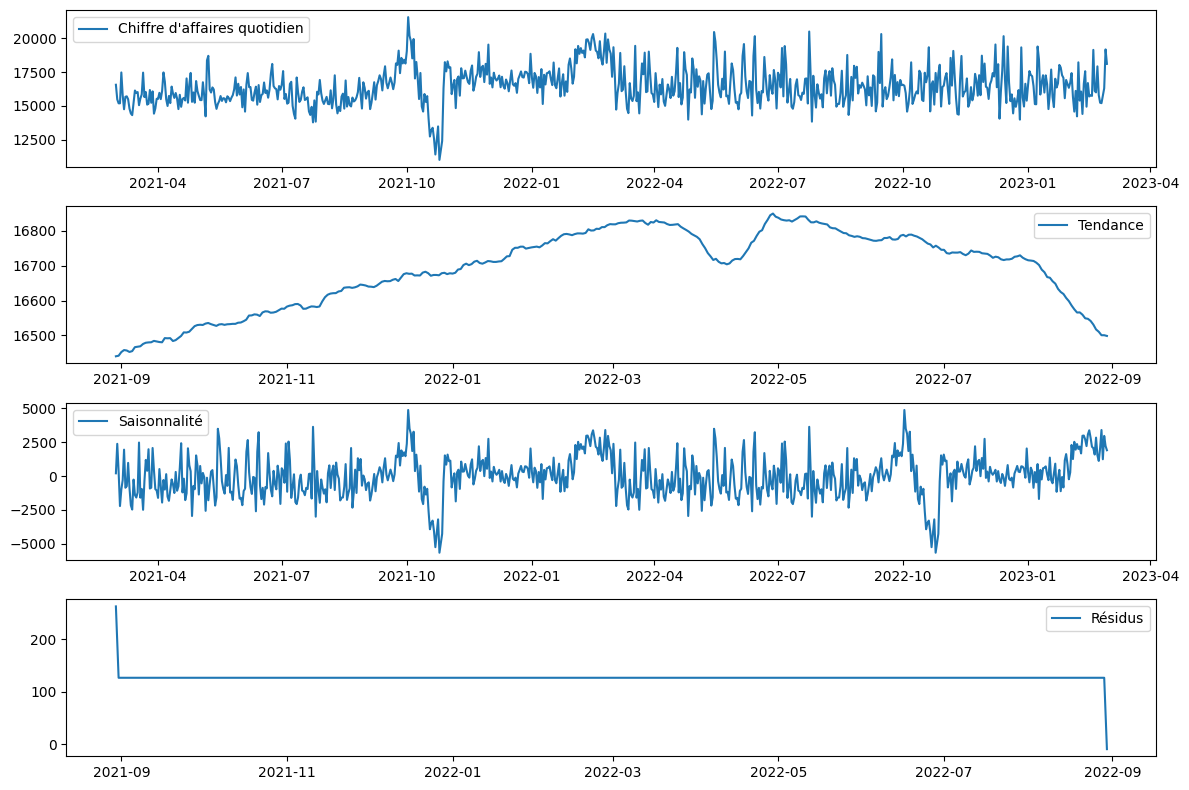

In [82]:
transac_customers['date'] = pd.to_datetime(transac_customers['date'], errors='coerce')

# Supprimez les valeurs nulles après la conversion
transac_customers = transac_customers.dropna(subset=['date'])

# Groupez par date et calculez le chiffre d'affaires quotidien
chiffre_affaires_quotidien = transac_customers.groupby(transac_customers['date'].dt.date)['price'].sum()

# Effectuez une décomposition saisonnière en utilisant la moyenne mobile
result = seasonal_decompose(chiffre_affaires_quotidien, model='additive', period=365)

# Affichez les composants de la décomposition
tendance = result.trend
saisonnalite = result.seasonal
residus = result.resid

# Affichez les résultats
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(chiffre_affaires_quotidien, label='Chiffre d\'affaires quotidien')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(tendance, label='Tendance')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(saisonnalite, label='Saisonnalité')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residus, label='Résidus')
plt.legend()

plt.tight_layout()
plt.show()


**Chiffre d'affaires quotidien:**

<span style="color:darkorange;">Le chiffre d'affaires quotidien représente les revenus générés au quotidien au fil du temps.</span>

1. <span style="color:darkorange;">**Observations sur les Variations du Chiffre d'Affaires :**</span>
   - <span style="color:darkorange;">Des fluctuations sont clairement identifiables dans le chiffre d'affaires, avec des pics plus prononcés de septembre à décembre 2021, oscillant entre 17,500 et 20,000.</span>
   - <span style="color:darkorange;">Une diminution significative se manifeste au milieu de décembre, chutant à environ -50,000.</span>

2. <span style="color:darkorange;">**Tendance :**</span>
   - <span style="color:darkorange;">On observe une progression constante du chiffre d'affaires de juin 2021 à mars 2022, indiquant une croissance continue de l'activité commerciale avec une augmentation des ventes au fil du temps.</span>
   - <span style="color:darkorange;">Cependant, une diminution est perceptible de fin mars à début mai 2022, suivie d'une reprise de la hausse de mai à juillet. Une baisse significative est notée mi-juillet à septembre.</span>
   - <span style="color:darkorange;">À partir de 2022, une tendance de stabilisation du chiffre d'affaires se dessine, caractérisée par des pics d'achats plus réguliers. Aucun pic bas n'est observé, bien que des diminutions légères soient notables.</span>

**Saisonnalité:**

<span style="color:darkorange;">Nous constatons une régularité dans le chiffre d'affaires avec des pics constants. Cependant, dans notre saisonnalité, trois pics importants se démarquent, notamment début décembre 2021-2022, atteignant jusqu'à 50 000, et un pic au milieu de janvier d'environ 2 500.</span>

**Résidus:**

<span style="color:darkorange;">Les résidus représentent la différence entre les valeurs réelles d'une mesure (chiffre d'affaires) et les variations des données non expliquées.</span>

1. <span style="color:darkorange;">Augmentation des résidus en septembre 2021.</span>
2. <span style="color:darkorange;">On remarque une ligne droite autour des 150, suggérant une stabilisation des résidus après une hausse initiale. Cela pourrait indiquer que les variations inexpliquées ont atteint un niveau constant pendant une période donnée.</span>
3. <span style="color:darkorange;">Une baisse significative en septembre 2022 avec une diminution à zéro pourrait également indiquer une possible surcorrection ou une simplification excessive du modèle.</span>

<span style="color:darkorange;">Les variations dans le graphique de résidus peuvent signaler des défis spécifiques dans la modélisation ou des événements particuliers qui influent sur le chiffre d'affaires et qui ne sont pas correctement capturés par le modèle de décomposition saisonnière. Une analyse plus approfondie pourrait être nécessaire pour ajuster le modèle en conséquence.</span>


In [83]:
transac_customers = transac_customers.reset_index()
transac_customers

,index,id_prod,price,categ,date,session_id,client_id,sex,birth,heure
0,0,0_1421,19.99,0,2021-03-01 04:13:00.107748,s_101,c_8533,m,1972,4
1,1,0_1421,19.99,0,2022-10-01 04:13:00.107748,s_276043,c_8533,m,1972,4
2,2,0_1421,19.99,0,2022-12-01 04:13:00.107748,s_305391,c_8533,m,1972,4
3,3,0_1421,19.99,0,2023-01-01 04:13:00.107748,s_320253,c_8533,m,1972,4
4,4,0_2199,12.99,0,2021-03-25 17:43:48.819074,s_11366,c_8533,m,1972,17
...,...,...,...,...,...,...,...,...,...,...
687293,687529,2_163,68.99,2,2022-10-28 16:51:07.389515,s_289331,c_7739,m,1997,16
687294,687530,2_101,63.99,2,2021-07-21 09:11:12.619736,s_65192,c_7089,m,2002,9
687295,687531,2_101,63.99,2,2022-03-21 09:11:12.619736,s_182240,c_7089,m,2002,9
687296,687532,2_101,63.99,2,2022-10-21 09:11:12.619736,s_285788,c_7089,m,2002,9


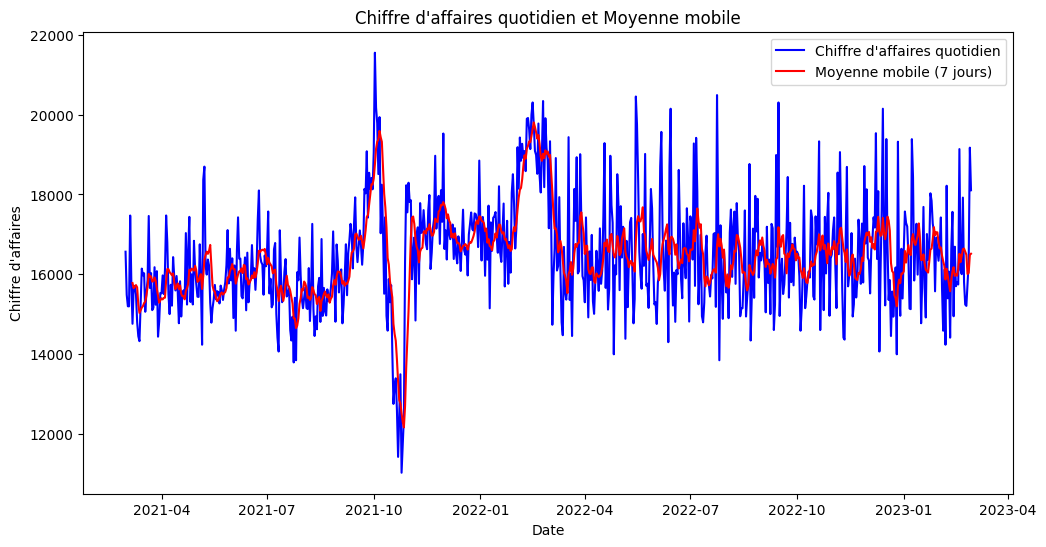

In [84]:
# Définir la période pour la moyenne mobile (par exemple, 7 jours pour une moyenne mobile sur une semaine)
periode_moyenne_mobile = 7

# Calculer la moyenne mobile
moyenne_mobile = chiffre_affaires_quotidien.rolling(window=periode_moyenne_mobile).mean()

# Afficher les résultats
plt.figure(figsize=(12, 6))

plt.plot(chiffre_affaires_quotidien, label='Chiffre d\'affaires quotidien', color='blue')
plt.plot(moyenne_mobile, label=f'Moyenne mobile ({periode_moyenne_mobile} jours)', color='red')

plt.title('Chiffre d\'affaires quotidien et Moyenne mobile')
plt.xlabel('Date')
plt.ylabel('Chiffre d\'affaires')
plt.legend()
plt.show()



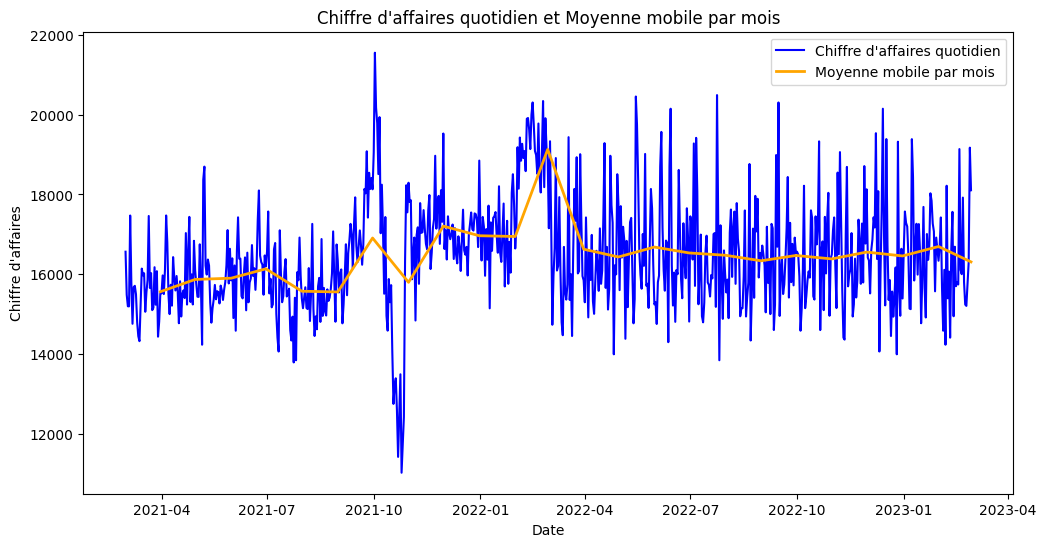

In [85]:
# Convertir l'index en DatetimeIndex
chiffre_affaires_quotidien.index = pd.to_datetime(chiffre_affaires_quotidien.index)

# Calculer la moyenne mobile par mois
moyenne_mobile_mois = chiffre_affaires_quotidien.resample('M').mean()

# Afficher les résultats
plt.figure(figsize=(12, 6))
plt.plot(chiffre_affaires_quotidien, label='Chiffre d\'affaires quotidien', color='blue')
plt.plot(moyenne_mobile_mois, label='Moyenne mobile par mois', color='orange', linewidth=2)
plt.title('Chiffre d\'affaires quotidien et Moyenne mobile par mois')
plt.xlabel('Date')
plt.ylabel('Chiffre d\'affaires')
plt.legend()
plt.show()

**Chiffre d'affaires quotidien et mobile:**

<span style="color:darkorange;">Représente le montant total des ventes générées par une entreprise au cours d'une journée spécifique. C'est une mesure clé pour évaluer la performance commerciale quotidienne.</span>
<span style="color:darkorange;">Observation journalière:Indicateur du chiffre d'affaire quotidien moyen sur une période glissante de 7 jours et montre les tendances commerciales générale de la semaine.</span>
<span style="color:darkorange;"> Observation des tendances à plus long terme et atténuer les variations plus courtes.</span>
<span style="color:darkorange;"> Optention d'une vue d'ensemble sur les différentes échelles de temps, et identifier les tendances sur le court et moyen long terme dans le comportement du chiffre d'affaire.</span>

1. <span style="color:darkorange;">**Moyenne mobile 7 jours:**</span>
   - <span style="color:darkorange;">Légère variation dans le chiffre d'affaires de avril 2021 à fin juillet, avec des tendances générales stabilisées autour de 160 000.</span>
   - <span style="color:darkorange;">début décembre, un pic important se manifeste, atteignant près de 20 000, suivi d'une baisse significative à partir du 10-2021.</span>
   - <span style="color:darkorange;">Une hausse significative se produit vers janvier 2022, avec le chiffre d'affaires atteignant environ 170 000. </span>
   - <span style="color:darkorange;"> Un pic majeur est observé mi-janvier à fin janvier, approchant à nouveau les 20 000. À partir de là, la moyenne mobile se stabilise jusqu'en février 2023, avec une régularité autour de 17 000 et des baisses régulières autour de 16 000.</span>

<span style="color:darkorange;">La moyenne mobile sur 7 jours met en lumière des tendances significatives, notamment des pics saisonniers et des périodes de stabilité.</span>

2. <span style="color:darkorange;">**Moyenne mobile par mois:**</span>

<span style="color:darkorange;">L'observation de la moyenne mobile par mois révèle des tendances stables et moins fluctuantes au cours de la période 2021. Le chiffre d'affaires moyen se maintient autour de **160,000**. Pour la période ultérieure, à partir de 2022, on note une augmentation modérée avec des tendances générales autour de **170,000**.</span>

**Points Saisissants :**
- <span style="color:darkorange;">Les pics saisonniers demeurent relativement stables, oscillant autour de **160,000** pour la période 2021 et autour de **170,000** pour la période ultérieure.</span>
- <span style="color:darkorange;">Trois pics importants continuent de se démarquer, le premier début décembre, atteignant environ **170,000**. Le deuxième survient début janvier, légèrement au-dessus de décembre, et le troisième pic significatif mi-janvier, culminant jusqu'à **190,000**.</span>

- <span style="color:darkorange;">La stabilité des pics mensuels suggère une certaine régularité dans les performances commerciales.</span>
- <span style="color:darkorange;">L'augmentation modérée du chiffre d'affaires à partir de 2022 pourrait indiquer une croissance constante.</span>
- <span style="color:darkorange;">Les pics saisonniers, en particulier celui de mi-janvier, pourraient être associés à des événements ou périodes de forte demande.</span>

<span style="color:darkorange;">En somme, la moyenne mobile par mois met en évidence des tendances plus régulières et offre une perspective mensuelle plus stable sur le chiffre d'affaires, permettant une meilleure compréhension des fluctuations saisonnières et des moments clés d'activité commerciale.</span>

__ADF (Augmented Dickey-Fuller)  :__ Analyse date et prix

- Déterminer une série temporelle, moyenne et variance.

In [86]:

from statsmodels.tsa.stattools import adfuller

# Assurez-vous que la colonne 'date' est de type datetime
transac_customers['date'] = pd.to_datetime(transac_customers['date'])

# Filtrer les données pour inclure uniquement le semestre 2021
transac_customers_2021 = transac_customers[(transac_customers['date'] >= '2021-09-01') & (transac_customers['date'] <= '2021-12-31')]

# Triez les données par ordre chronologique
transac_customers_2021 = transac_customers_2021.sort_values(by='date')

# Extraitz la colonne 'prix' pour le test ADF
prix_serie = transac_customers_2021['price']

# Effectuez le test ADF
resultat_adf = adfuller(prix_serie, autolag='AIC')

# Affichez les résultats du test
print('Statistic ADF :', resultat_adf[0])
print('Valeur critique :', resultat_adf[4])
print('P-valeur :', resultat_adf[1])

# Comparez la statistique ADF à la valeur critique pour prendre une décision sur la stationnarité
if resultat_adf[0] < resultat_adf[4]['5%']:
   print('La série est stationnaire (rejeter l\'hypothèse nulle)')
else:
   print('La série n\'est pas stationnaire (échouer à rejeter l\'hypothèse nulle)')


Statistic ADF : -34.73133488573391
Valeur critique : {'1%': -3.430403343096866, '5%': -2.86156357686097, '10%': -2.5667825491297425}
P-valeur : 0.0
La série est stationnaire (rejeter l'hypothèse nulle)


1. <span style="color:darkorange;">-ADF négative ainsi que la valeur critique et la p-valeur. </span>

2. <span style="color:darkorange;">-On peut conclure que les valeurs sont très faible et que la série temprelle est stationnaire.</span>

<span style="color:darkorange;">Cela signifie que les propriétés statistiques de la série, comme la moyenne et la variance, restent constantes au fil du temps.</span>


<span style="color:darkorange;">On peut donc conclure que la série des prix est relativement stable dans l'ensemble en terme de statistiques fondamentales mais cela ne veut pas dire que les prix sont constantes, mais plutôt que les variations observées sont relativement stables. </span>


In [87]:
#adfuller

# Assurez-vous que la colonne 'date' est de type datetime
transac_customers['date'] = pd.to_datetime(transac_customers['date'])

# Filtrer les données pour inclure uniquement le semestre 2021
transac_customers_2021 = transac_customers[(transac_customers['date'] >= '2022-09-01') & (transac_customers['date'] <= '2022-12-31')]

# Triez les données par ordre chronologique
transac_customers_2021 = transac_customers_2021.sort_values(by='date')

# Extraitz la colonne 'prix' pour le test ADF
prix_serie = transac_customers_2021['price']

# Effectuez le test ADF
resultat_adf = adfuller(prix_serie, autolag='AIC')

# Affichez les résultats du test
print('Statistic ADF :', resultat_adf[0])
print('Valeur critique :', resultat_adf[4])
print('P-valeur :', resultat_adf[1])

# Comparez la statistique ADF à la valeur critique pour prendre une décision sur la stationnarité
if resultat_adf[0] < resultat_adf[4]['5%']:
   print('La série est stationnaire (rejeter l\'hypothèse nulle)')
else:
   print('La série n\'est pas stationnaire (échouer à rejeter l\'hypothèse nulle)')

Statistic ADF : -38.143397708930195
Valeur critique : {'1%': -3.4304075604942983, '5%': -2.8615654408702667, '10%': -2.566783541279156}
P-valeur : 0.0
La série est stationnaire (rejeter l'hypothèse nulle)


1. <span style="color:darkorange;">-ADF négative, on peut dire que la série est stationnaire. </span>

2. <span style="color:darkorange;">- p_valeur est associé au test ADF très faible, égale à 0.</span>

<span style="color:darkorange;">Cela signifie que les propriétés statistiques de la série, comme la moyenne et la variance, restent constantes au fil du temps.</span>


<span style="color:darkorange;">On peut donc confirmer que la série prix est relativement stable est statinnaire. </span>


In [88]:
transac_customers

,index,id_prod,price,categ,date,session_id,client_id,sex,birth,heure
0,0,0_1421,19.99,0,2021-03-01 04:13:00.107748,s_101,c_8533,m,1972,4
1,1,0_1421,19.99,0,2022-10-01 04:13:00.107748,s_276043,c_8533,m,1972,4
2,2,0_1421,19.99,0,2022-12-01 04:13:00.107748,s_305391,c_8533,m,1972,4
3,3,0_1421,19.99,0,2023-01-01 04:13:00.107748,s_320253,c_8533,m,1972,4
4,4,0_2199,12.99,0,2021-03-25 17:43:48.819074,s_11366,c_8533,m,1972,17
...,...,...,...,...,...,...,...,...,...,...
687293,687529,2_163,68.99,2,2022-10-28 16:51:07.389515,s_289331,c_7739,m,1997,16
687294,687530,2_101,63.99,2,2021-07-21 09:11:12.619736,s_65192,c_7089,m,2002,9
687295,687531,2_101,63.99,2,2022-03-21 09:11:12.619736,s_182240,c_7089,m,2002,9
687296,687532,2_101,63.99,2,2022-10-21 09:11:12.619736,s_285788,c_7089,m,2002,9


 <span style="color:blue; font-weight:bold; font-size:2em;">VI]Segmentation client  </span>

#### <span style="color: #87CEEB;">a.VI)Répartition par genre </span>

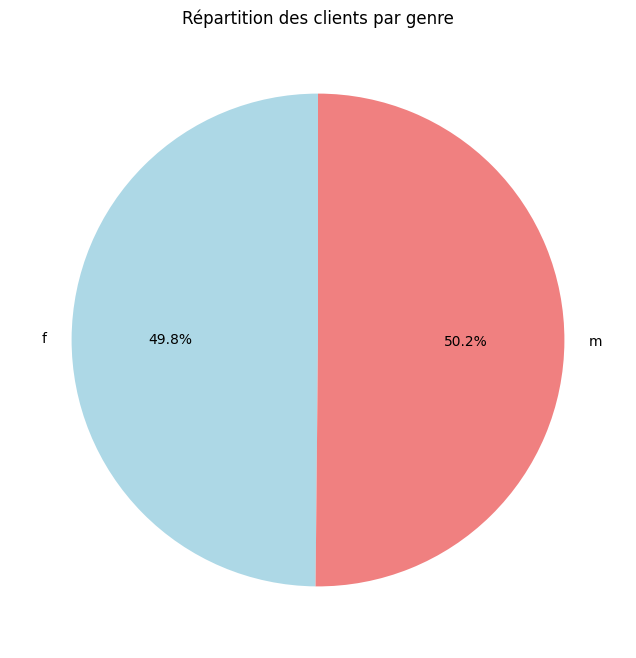

In [89]:
# Groupez par le genre et comptez le nombre de clients pour chaque genre
repartition_genre = transac_customers.groupby('sex')['client_id'].count()

# Créez un diagramme circulaire pour visualiser la répartition
plt.figure(figsize=(8, 8))
plt.pie(repartition_genre, labels=repartition_genre.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Répartition des clients par genre')
plt.show()


<span style="color:darkorange;">Aucune distinction notable par genre.</span>

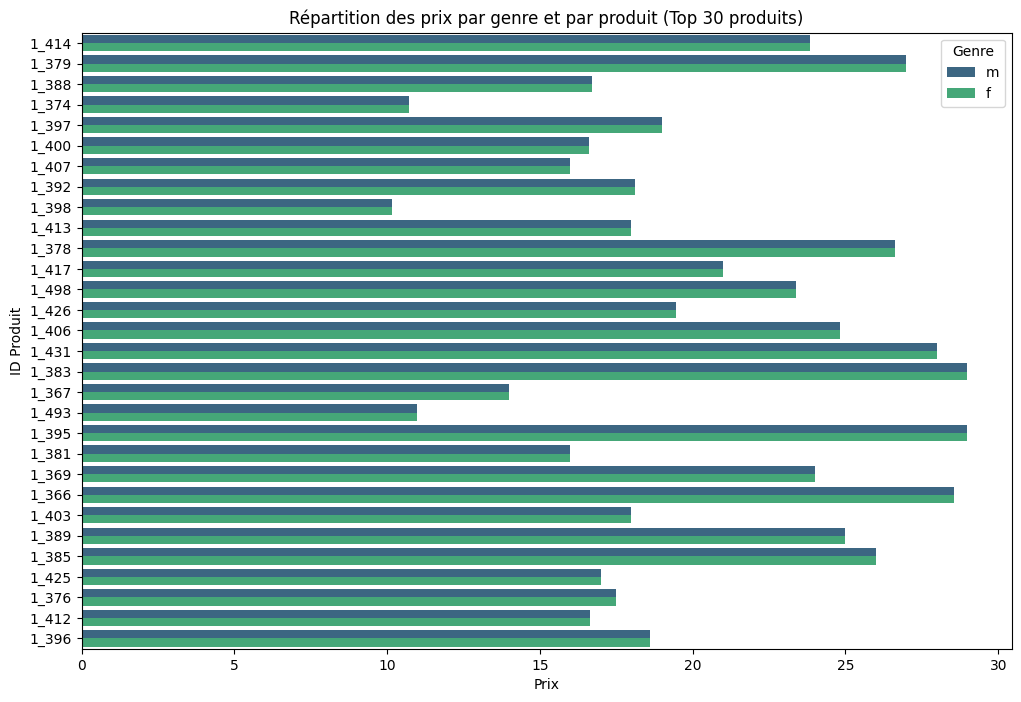

In [90]:
# Sélectionner les 30 premiers ID de produits en termes de fréquence
top_30_produits = transac_customers['id_prod'].value_counts().head(30).index

# Filtrer le DataFrame pour inclure uniquement ces 10 ID de produits
transac_top_30 = transac_customers[transac_customers['id_prod'].isin(top_30_produits)]

# Créer un graphique à barres horizontales groupées avec Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=transac_top_30, y='id_prod', x='price', hue='sex', palette='viridis')

# Ajouter des étiquettes et des titres
plt.title('Répartition des prix par genre et par produit (Top 30 produits)')
plt.ylabel('ID Produit')
plt.xlabel('Prix')
plt.legend(title='Genre', bbox_to_anchor=(1, 1))

plt.show()

<span style="color:darkorange;">Aucune distinction notable dans la répartion des prix par genre.</span>

In [91]:
transac_customers

,index,id_prod,price,categ,date,session_id,client_id,sex,birth,heure
0,0,0_1421,19.99,0,2021-03-01 04:13:00.107748,s_101,c_8533,m,1972,4
1,1,0_1421,19.99,0,2022-10-01 04:13:00.107748,s_276043,c_8533,m,1972,4
2,2,0_1421,19.99,0,2022-12-01 04:13:00.107748,s_305391,c_8533,m,1972,4
3,3,0_1421,19.99,0,2023-01-01 04:13:00.107748,s_320253,c_8533,m,1972,4
4,4,0_2199,12.99,0,2021-03-25 17:43:48.819074,s_11366,c_8533,m,1972,17
...,...,...,...,...,...,...,...,...,...,...
687293,687529,2_163,68.99,2,2022-10-28 16:51:07.389515,s_289331,c_7739,m,1997,16
687294,687530,2_101,63.99,2,2021-07-21 09:11:12.619736,s_65192,c_7089,m,2002,9
687295,687531,2_101,63.99,2,2022-03-21 09:11:12.619736,s_182240,c_7089,m,2002,9
687296,687532,2_101,63.99,2,2022-10-21 09:11:12.619736,s_285788,c_7089,m,2002,9


#### <span style="color: #87CEEB;">b.VI) Répartition par cathégories </span>

,index,id_prod,price,categ,date,session_id,client_id,sex,birth,heure,cat_as_int
0,0,0_1421,19.99,0,2021-03-01 04:13:00.107748,s_101,c_8533,m,1972,4,0
1,1,0_1421,19.99,0,2022-10-01 04:13:00.107748,s_276043,c_8533,m,1972,4,0
2,2,0_1421,19.99,0,2022-12-01 04:13:00.107748,s_305391,c_8533,m,1972,4,0
3,3,0_1421,19.99,0,2023-01-01 04:13:00.107748,s_320253,c_8533,m,1972,4,0
4,4,0_2199,12.99,0,2021-03-25 17:43:48.819074,s_11366,c_8533,m,1972,17,0
...,...,...,...,...,...,...,...,...,...,...,...
687293,687529,2_163,68.99,2,2022-10-28 16:51:07.389515,s_289331,c_7739,m,1997,16,2
687294,687530,2_101,63.99,2,2021-07-21 09:11:12.619736,s_65192,c_7089,m,2002,9,2
687295,687531,2_101,63.99,2,2022-03-21 09:11:12.619736,s_182240,c_7089,m,2002,9,2
687296,687532,2_101,63.99,2,2022-10-21 09:11:12.619736,s_285788,c_7089,m,2002,9,2


,categ,average_price_per_product,number_of_sales
0,0,10.638188,2292
1,1,20.490948,737
2,2,76.207412,236


Index(['2_159', '2_135', '2_112', '2_102', '2_209', '1_395', '1_369', '2_110',
       '1_383', '1_414', '2_39', '2_166', '1_498', '2_43', '1_406', '1_366',
       '1_385', '1_431', '1_379', '1_378'],
      dtype='object', name='id_prod')

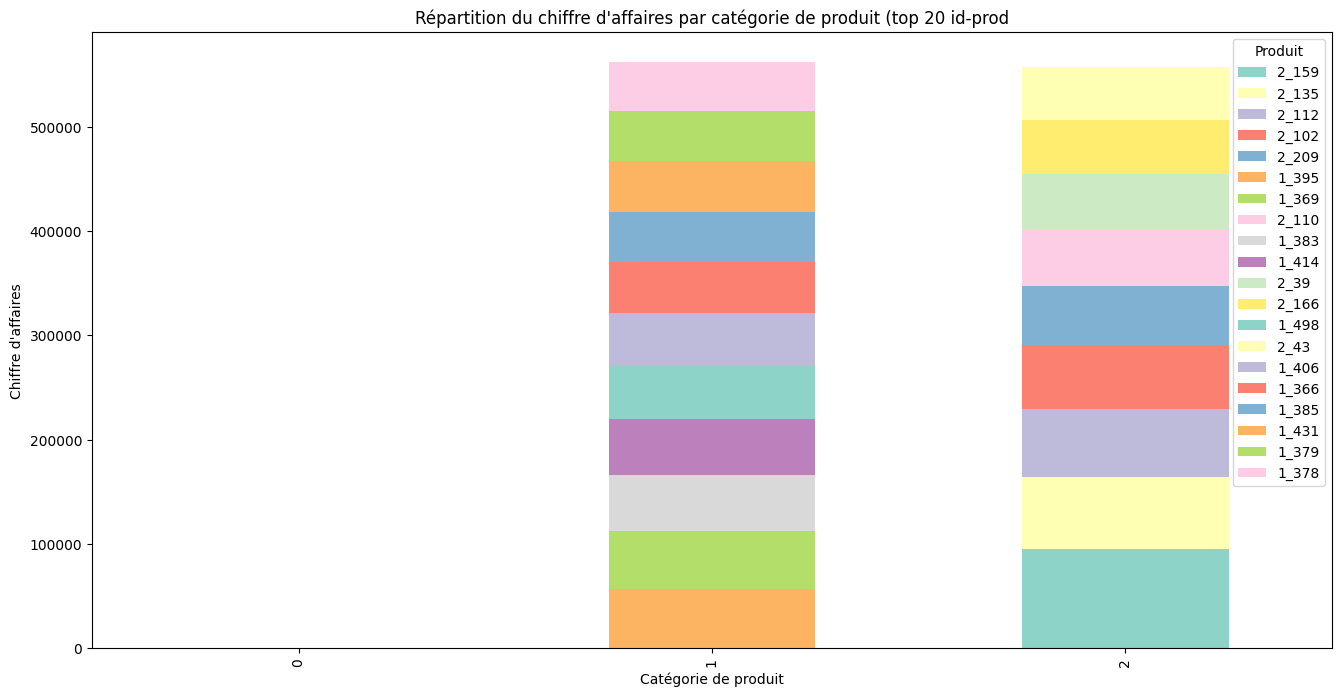

In [92]:
# Ajouter une colonne catégorie en tant que nombre entier
transac_customers['cat_as_int'] = transac_customers['categ'].astype(int)
display(transac_customers)

result = transac_customers.groupby(['categ']).agg({'price': 'mean', 'id_prod': 'nunique'})

# Rename columns for clarity
result.columns = ['average_price_per_product', 'number_of_sales']

# Reset index to make 'categ' and 'id_prod' regular columns
result.reset_index(inplace=True)

# Display the result
display(result)


# Répartition du chiffre d'affaires par catégorie de produit
repartition_ca_categorie = transac_customers.groupby(['cat_as_int', 'id_prod'])['price'].sum().unstack()

# Sélectionner les 20 premières catégories
top_20_categories = repartition_ca_categorie.sum(axis=0).sort_values(ascending=False).head(20).index

display(top_20_categories)


# Réindexer le DataFrame pour inclure toutes les catégories
repartition_ca_categorie = repartition_ca_categorie.reindex(columns=top_20_categories, fill_value=0)

# Utiliser la palette de couleurs "Set3" de Seaborn
palette_couleurs = sns.color_palette("Set3", n_colors=len(top_20_categories))

# Créer un graphique à barres pour la répartition du chiffre d'affaires par catégorie de produit (20 premières catégories)
repartition_ca_categorie.plot(kind='bar', stacked=True, figsize=(16, 8), color=palette_couleurs)

# Ajouter des étiquettes et des titres
plt.title('Répartition du chiffre d\'affaires par catégorie de produit (top 20 id-prod')
plt.xlabel('Catégorie de produit')
plt.ylabel('Chiffre d\'affaires')
plt.legend(title='Produit', bbox_to_anchor=(1, 1))
plt.show()


<span style="color:darkorange;">La répartition du chiffre d'affaires par catégorie de produit révèle quelques variations légères. Notamment, une hausse est observée dans la répartition de certains produits spécifiques, tels que les produits identifiés par les références 2-159, 2-1135. </span> 

<span style="color:darkorange;">La Catégorie 0 n'apparait pas dans notre top 20.</span> 

In [93]:
#agrégation en statistiques

# Calculer les statistiques pour la catégorie femme
result_female = transac_customers[transac_customers['sex'] == 'f'].groupby(['categ']).agg({'price': 'mean', 'id_prod': 'nunique'})
result_female.columns = ['average_price_per_product', 'number_of_sales']
result_female.reset_index(inplace=True)

# Calculer les statistiques pour la catégorie homme
result_male = transac_customers[transac_customers['sex'] == 'm'].groupby(['categ']).agg({'price': 'mean', 'id_prod': 'nunique'})
result_male.columns = ['average_price_per_product', 'number_of_sales']
result_male.reset_index(inplace=True)

# Afficher les résultats
print("Statistiques pour la catégorie Femme:")
print(result_female)

print("\nStatistiques pour la catégorie Homme:")
print(result_male)

Statistiques pour la catégorie Femme:
   categ  average_price_per_product  number_of_sales
0      0                  10.625818             2224
1      1                  20.530641              730
2      2                  75.869527              225

Statistiques pour la catégorie Homme:
   categ  average_price_per_product  number_of_sales
0      0                  10.650365             2220
1      1                  20.450230              731
2      2                  76.511561              229


<span style="color:darkorange;">**Statistiques pour la catégorie Femme:**</span> 
- <span style="color:darkorange;">En moyenne, les produits sont vendus à 10,63 €.</span> 
- <span style="color:darkorange;">Il y a eu 2 224 ventes de produits.</span> 

<span style="color:darkorange;">**Statistiques pour la catégorie Homme:**</span> 
- <span style="color:darkorange;">En moyenne, les produits dans la catégorie Homme sont vendus à 10,65 €.</span> 
-  <span style="color:darkorange;">Il y a eu 2 220 ventes de produits.</span> 

<span style="color:darkorange;">Les prix moyens par produit sont très proches entre les deux catégories, avec une légère différence en faveur de la catégorie Homme.
Le nombre total de ventes est également similaire, mais il y a une légère variation, avec la catégorie Femme ayant un nombre légèrement plus élevé de ventes. Globalement, les deux catégories semblent avoir des performances de vente comparables en termes de nombre de ventes et de prix moyen par produit.</span>


In [94]:
print(transac_customers[transac_customers['cat_as_int'] == 0])


         index id_prod  price  categ                       date session_id  \
0            0  0_1421  19.99      0 2021-03-01 04:13:00.107748      s_101   
1            1  0_1421  19.99      0 2022-10-01 04:13:00.107748   s_276043   
2            2  0_1421  19.99      0 2022-12-01 04:13:00.107748   s_305391   
3            3  0_1421  19.99      0 2023-01-01 04:13:00.107748   s_320253   
4            4  0_2199  12.99      0 2021-03-25 17:43:48.819074    s_11366   
...        ...     ...    ...    ...                        ...        ...   
687275  687511  0_1066   9.44      0 2021-08-03 11:46:26.883356    s_70843   
687276  687512  0_1856   9.57      0 2021-11-13 23:00:11.780612   s_119245   
687277  687513  0_1856   9.57      0 2022-12-13 23:00:11.780612   s_311618   
687287  687523   0_142  19.85      0 2021-09-25 18:07:25.880052    s_95415   
687288  687524   0_142  19.85      0 2022-03-25 18:07:25.880052   s_184472   

       client_id sex  birth  heure  cat_as_int  
0         c_85

In [95]:
# Sélectionner les lignes où "categ" est égal à 0 et afficher les colonnes spécifiées
categ_0_data = transac_customers[transac_customers['categ'] == 0][['id_prod', 'client_id', 'price']]

# Afficher les données
print(categ_0_data.head())

  id_prod client_id  price
0  0_1421    c_8533  19.99
1  0_1421    c_8533  19.99
2  0_1421    c_8533  19.99
3  0_1421    c_8533  19.99
4  0_2199    c_8533  12.99


In [96]:
# Sélectionner les lignes où "categ" est égal à 0
categ_0_data = transac_customers[transac_customers['categ'] == 0]

# Top 10 des produits categ 0 en fonction du chiffre d'affaires (price)
top_10_categ_0_products = categ_0_data.groupby('id_prod')['price'].sum().nlargest(10)

# Afficher le résultat
print(top_10_categ_0_products)

id_prod
0_1441    23452.65
0_1421    23008.49
0_1414    22287.00
0_1451    21689.15
0_1417    21372.12
0_1448    20701.42
0_1470    20194.02
0_1430    20109.87
0_1353    19430.28
0_1355    19312.83
Name: price, dtype: float64


<span style="color:darkorange;"> La catégorie 0 est associée à des prix plus bas néanmoins elle génère un chiffre d'affaire important en raison du volume de vente </span>

<span style="color:white; font-weight:bold;">Répartition par catégorie, id_prod et genre</span>

In [98]:
# module stats de la bibliothèque scipy
from scipy import stats

# Sélection des données pour chaque groupe de sexe
price_male = transac_customers[transac_customers['sex'] == 'm']['price']
price_female = transac_customers[transac_customers['sex'] == 'f']['price']

# Effectuer le test t de Student
t_statistic, p_value = stats.ttest_ind(price_male, price_female, equal_var=False)

# Afficher les résultats
print(f"Statistique de test t : {t_statistic}")
print(f"Valeur p : {p_value}")

# Interprétation des résultats
alpha = 0.05
if p_value < alpha:
    print("La différence de prix entre les sexes masculin et féminin est statistiquement significative. Rejeté H0.")
else:
    print("Il n'y a pas de différence significative de prix entre les sexes masculin et féminin. H0 n'est pas rejetée.")

Statistique de test t : 5.85869780990311
Valeur p : 4.667225627596934e-09
La différence de prix entre les sexes masculin et féminin est statistiquement significative. Rejeté H0.


<span style="color:darkorange;">La différence de prix entre le sex masculin et féminin n'est très significative dans nos données. Cela suggère que les produits achetés par les hommes et les femmes présentent des différences de prix.</span>

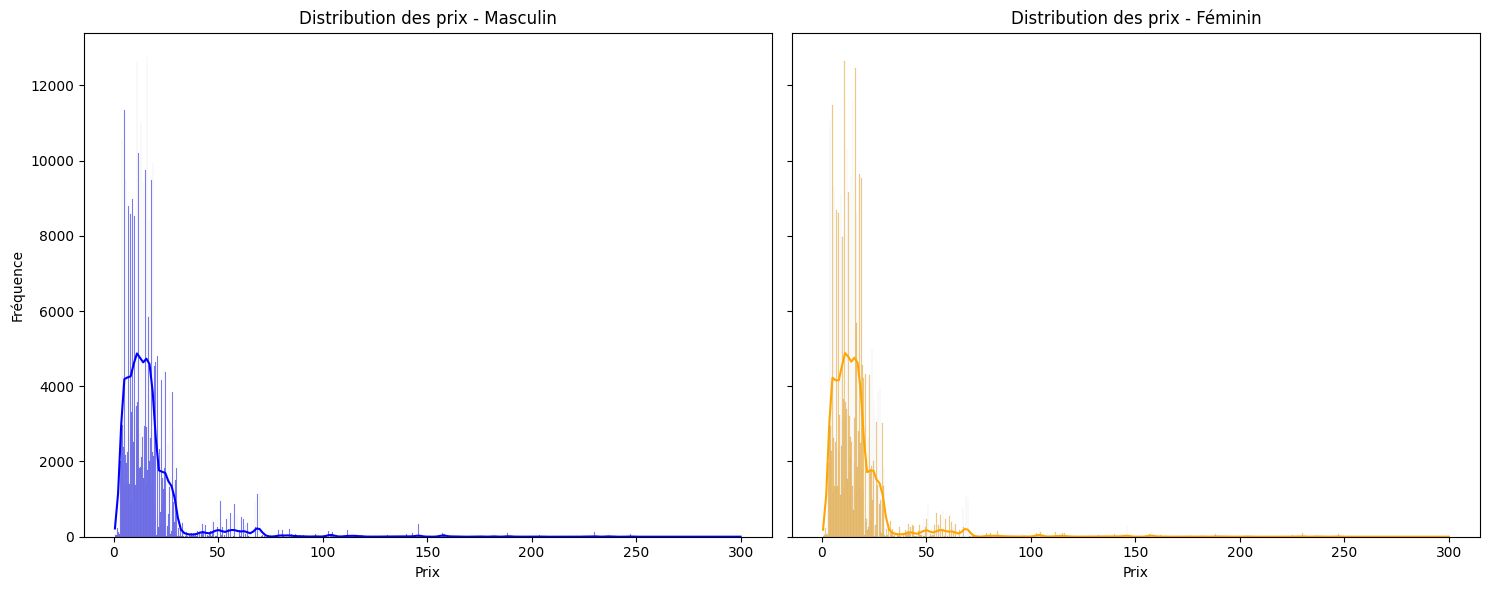

In [ ]:
# Sélection des données pour chaque groupe de sexe
price_male = transac_customers[transac_customers['sex'] == 'm']['price']
price_female = transac_customers[transac_customers['sex'] == 'f']['price']

# Création des graphiques de distribution côte à côte
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6), sharey=True)

# Distribution pour le sexe masculin
sns.histplot(price_male, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Distribution des prix - Masculin')
axes[0].set_xlabel('Prix')
axes[0].set_ylabel('Fréquence')

# Distribution pour le sexe féminin
sns.histplot(price_female, kde=True, color='orange', ax=axes[1])
axes[1].set_title('Distribution des prix - Féminin')
axes[1].set_xlabel('Prix')

# Ajustements de l'espace entre les graphiques
plt.tight_layout()

# Affichage des graphiques
plt.show()

<span style="color:darkorange;"> On remarque une légère différence dans la distribution des prix entre le sex masculin et féminin,  </span>

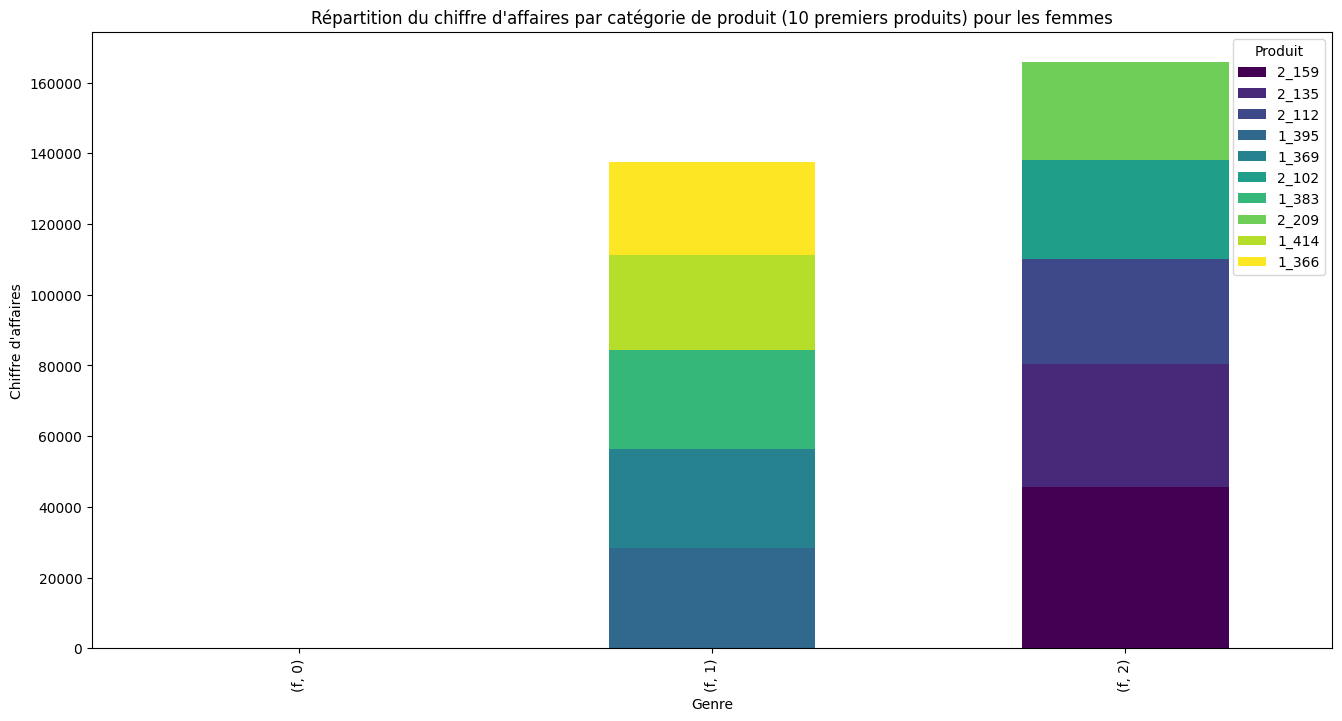

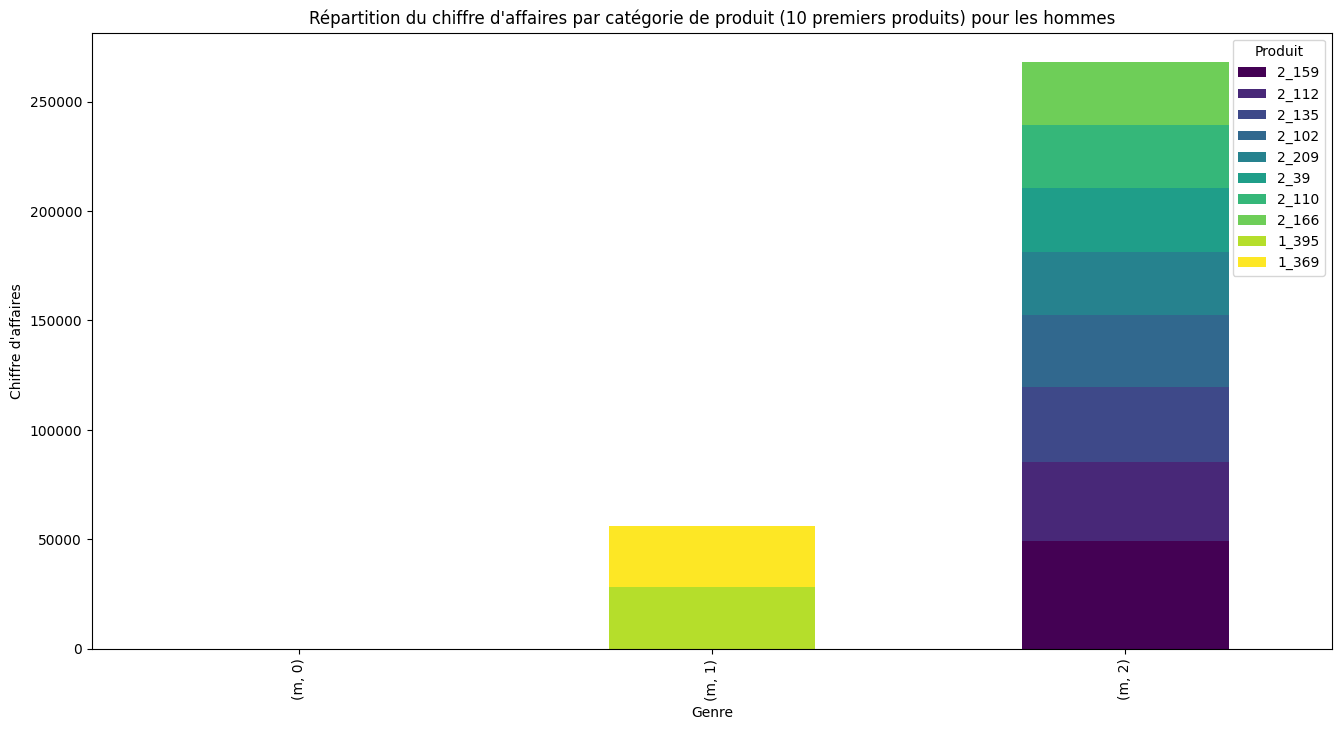

In [ ]:
# Filtrer les transactions pour les femmes
transac_femmes = transac_customers[transac_customers['sex'] == 'f']

# Filtrer les transactions pour les hommes
transac_hommes = transac_customers[transac_customers['sex'] == 'm']

# Répartition du chiffre d'affaires par genre et par catégorie de produit
repartition_ca_genre_categorie_femmes = transac_femmes.groupby(['sex', 'categ', 'id_prod'])['price'].sum().unstack()
repartition_ca_genre_categorie_hommes = transac_hommes.groupby(['sex', 'categ', 'id_prod'])['price'].sum().unstack()

# Sélectionner les 10 premiers produits par genre pour les femmes
top_10_produits_femmes = repartition_ca_genre_categorie_femmes.sum(axis=0).sort_values(ascending=False).head(10).index
repartition_ca_genre_categorie_top10_femmes = repartition_ca_genre_categorie_femmes[top_10_produits_femmes]

# Sélectionner les 10 premiers produits par genre pour les hommes
top_10_produits_hommes = repartition_ca_genre_categorie_hommes.sum(axis=0).sort_values(ascending=False).head(10).index
repartition_ca_genre_categorie_top10_hommes = repartition_ca_genre_categorie_hommes[top_10_produits_hommes]

# Créer un graphique à barres pour la répartition du chiffre d'affaires par catégorie de produit (10 premiers produits) pour les femmes
repartition_ca_genre_categorie_top10_femmes.plot(kind='bar', stacked=True, figsize=(16, 8), colormap='viridis')
plt.title('Répartition du chiffre d\'affaires par catégorie de produit (10 premiers produits) pour les femmes')
plt.xlabel('Genre')
plt.ylabel('Chiffre d\'affaires')
plt.legend(title='Produit', bbox_to_anchor=(1, 1))
plt.show()

# Créer un graphique à barres pour la répartition du chiffre d'affaires par catégorie de produit (10 premiers produits) pour les hommes
repartition_ca_genre_categorie_top10_hommes.plot(kind='bar', stacked=True, figsize=(16, 8), colormap='viridis')
plt.title('Répartition du chiffre d\'affaires par catégorie de produit (10 premiers produits) pour les hommes')
plt.xlabel('Genre')
plt.ylabel('Chiffre d\'affaires')
plt.legend(title='Produit', bbox_to_anchor=(1, 1))
plt.show()


<span style="color:darkorange;">La distinction du chiffre d'affaire par genre et par produit est particulièrement remarquable dans notre top 10. On observe des variations significatives tant dans le chiffre d'affaire que dans la consommation des produits en fonction du genre. Par exemple, les produits référencés 1-366 et 1-414 génèrent un chiffre d'affaire moins élevé chez le genre masculin par rapport au genre féminin, suggérant une disparité de consommation en termes de quantité. Ces observations sont clairement visualisées dans le graphique à barres ci-dessus, où chaque couleur représente un produit distinct, et les barres sont empilées pour chaque genre, offrant ainsi une perspective visuelle du comportement d'achat.</span>

<span style="color:darkorange;">On observe une distinction similaire pour les produits 2-159, 2-135 et 2-112, qui génèrent un chiffre d'affaire plus élevé chez le genre féminin que le genre masculin. Cependant, il est important de noter une plus grande diversité de produits chez le genre masculin, tels que le 2-39 et le 2-209, qui ne sont pas présents dans le genre féminin. En outre, cette analyse révèle que le genre masculin génère un chiffre d'affaires plus important, atteignant jusqu'à 250 000, tandis que le genre féminin présente un chiffre d'affaires autour de 160 000 pour cette catégorie spécifique.</span>

<span style="color:white; font-weight:bold;">Répartition par catégorie id_prod égal à 0 et genre</span>


In [ ]:
repartition_ca_genre_categorie_femmes.loc['f', 0]
repartition_ca_genre_categorie_hommes.loc['m', 0]

id_prod
0_0       2392.50
0_1       2099.09
0_10       161.55
0_100       20.60
0_1000    1559.52
           ...   
2_94          NaN
2_95          NaN
2_96          NaN
2_97          NaN
2_99          NaN
Name: (m, 0), Length: 3180, dtype: float64

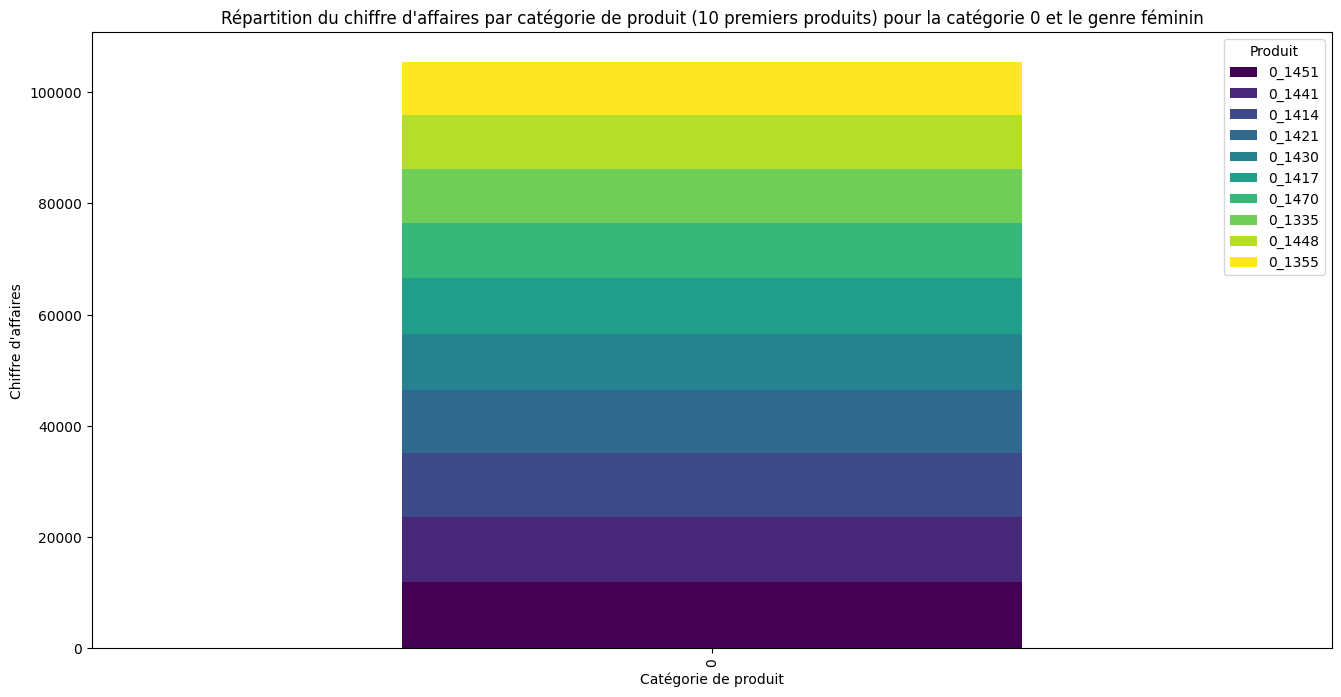

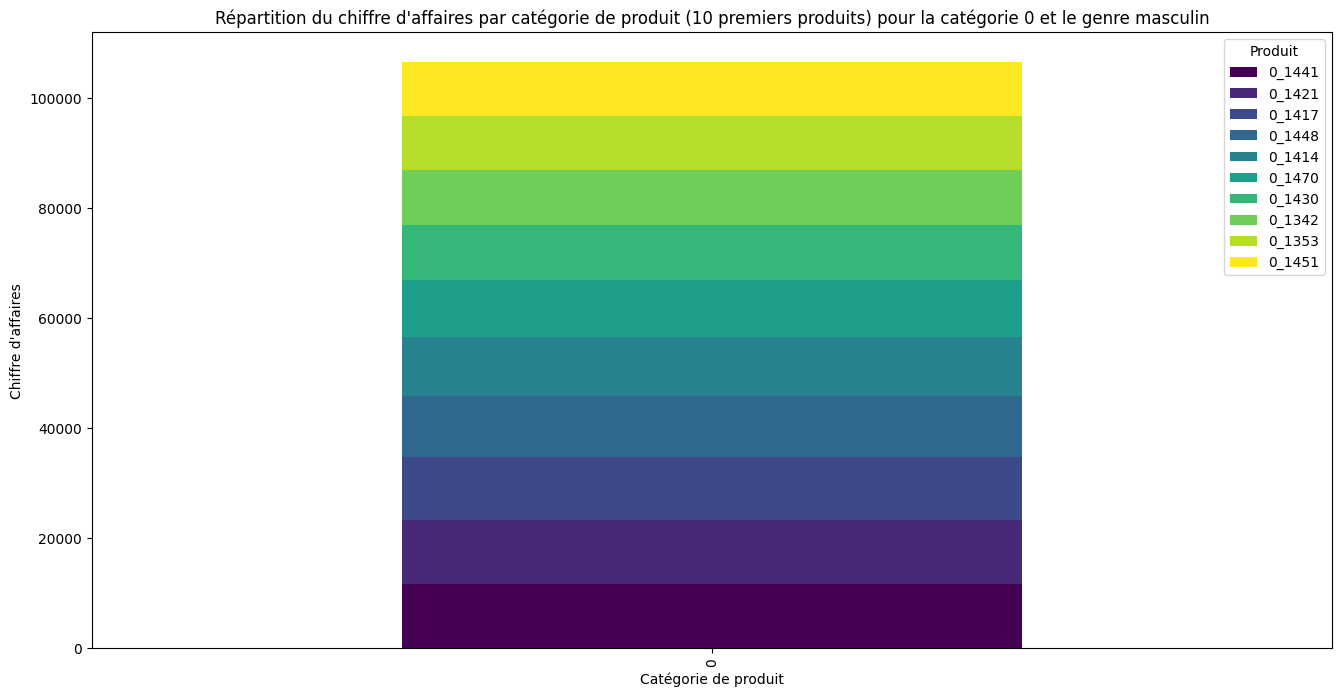

In [ ]:
# Filtrer les transactions pour la catégorie 0 et le genre féminin
transac_categ_0_female = transac_customers[(transac_customers['categ'] == 0) & (transac_customers['sex'] == 'f')]

# Filtrer les transactions pour la catégorie 0 et le genre masculin
transac_categ_0_male = transac_customers[(transac_customers['categ'] == 0) & (transac_customers['sex'] == 'm')]

# Répartition du chiffre d'affaires par catégorie de produit pour la catégorie 0 et le genre féminin
repartition_ca_categ_0_female = transac_categ_0_female.groupby(['categ', 'id_prod'])['price'].sum().unstack()

# Répartition du chiffre d'affaires par catégorie de produit pour la catégorie 0 et le genre masculin
repartition_ca_categ_0_male = transac_categ_0_male.groupby(['categ', 'id_prod'])['price'].sum().unstack()

# Sélectionner les 10 premiers produits pour la catégorie 0 et le genre féminin
top_10_produits_categ_0_female = repartition_ca_categ_0_female.sum(axis=0).sort_values(ascending=False).head(10).index
repartition_ca_categ_0_top10_female = repartition_ca_categ_0_female[top_10_produits_categ_0_female]

# Sélectionner les 10 premiers produits pour la catégorie 0 et le genre masculin
top_10_produits_categ_0_male = repartition_ca_categ_0_male.sum(axis=0).sort_values(ascending=False).head(10).index
repartition_ca_categ_0_top10_male = repartition_ca_categ_0_male[top_10_produits_categ_0_male]

# Créer un graphique à barres pour la répartition du chiffre d'affaires par catégorie de produit (10 premiers produits) pour la catégorie 0 et le genre féminin
repartition_ca_categ_0_top10_female.plot(kind='bar', stacked=True, figsize=(16, 8), colormap='viridis')
plt.title('Répartition du chiffre d\'affaires par catégorie de produit (10 premiers produits) pour la catégorie 0 et le genre féminin')
plt.xlabel('Catégorie de produit')
plt.ylabel('Chiffre d\'affaires')
plt.legend(title='Produit', bbox_to_anchor=(1, 1))
plt.show()

# Créer un graphique à barres pour la répartition du chiffre d'affaires par catégorie de produit (10 premiers produits) pour la catégorie 0 et le genre masculin
repartition_ca_categ_0_top10_male.plot(kind='bar', stacked=True, figsize=(16, 8), colormap='viridis')
plt.title('Répartition du chiffre d\'affaires par catégorie de produit (10 premiers produits) pour la catégorie 0 et le genre masculin')
plt.xlabel('Catégorie de produit')
plt.ylabel('Chiffre d\'affaires')
plt.legend(title='Produit', bbox_to_anchor=(1, 1))
plt.show()



<span style="color:darkorange;">Nous pouvons observer que, dans la répartition du chiffre d'affaires par id_prod pour la catégorie 0, tant pour le genre féminin que masculin, les chiffres d'affaires sont équivalents malgré une consommation identique d'id_prod. Cependant, des variations sont notables dans le classement des id_prod en termes de chiffre d'affaires, indiquant des différences dans la performance financière de chaque produit, indépendamment du genre comme le 0-1441 et 0-1451.</span>

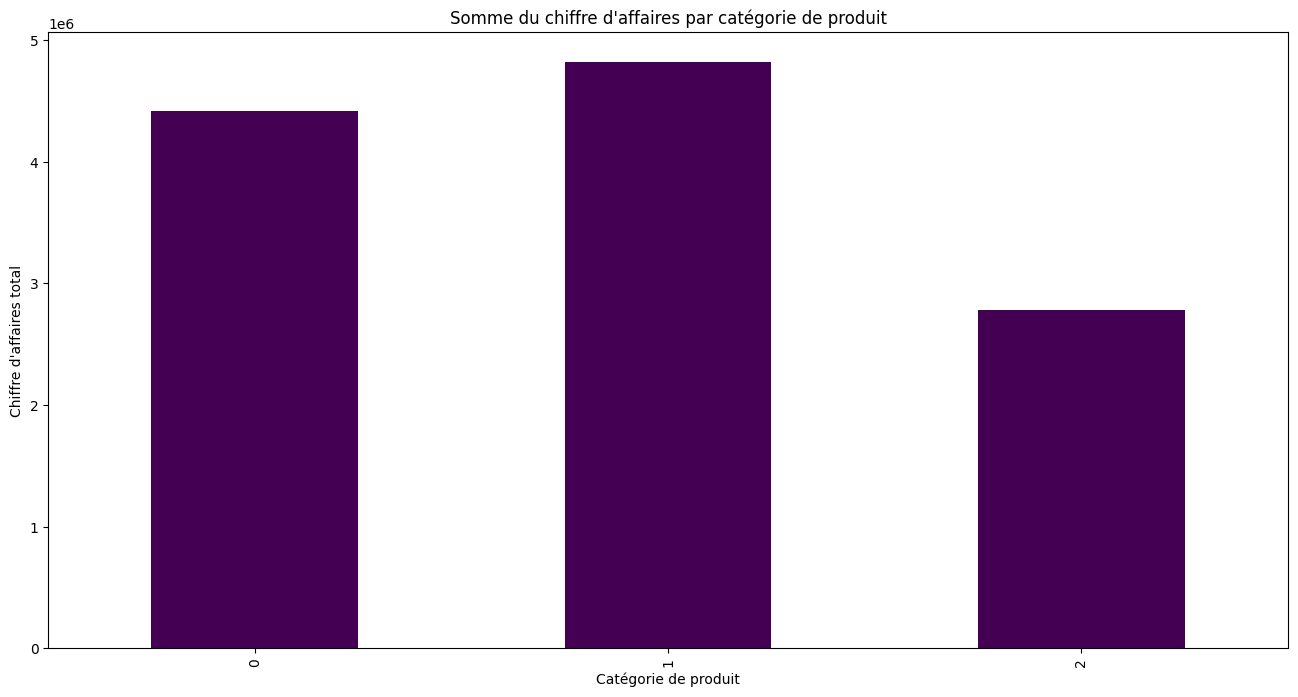

In [ ]:
# Répartition du chiffre d'affaires par catégorie de produit
repartition_ca_categorie = transac_customers.groupby(['categ', 'id_prod'])['price'].sum().unstack()

# Somme par catégorie
somme_par_categorie = repartition_ca_categorie.sum(axis=1)

# Créer un graphique à barres pour la somme du chiffre d'affaires par catégorie de produit
somme_par_categorie.plot(kind='bar', figsize=(16, 8), colormap='viridis')
plt.title('Somme du chiffre d\'affaires par catégorie de produit')
plt.xlabel('Catégorie de produit')
plt.ylabel('Chiffre d\'affaires total')
plt.show()



<span style="color:darkorange;">La confirmation que la catégorie 0 génère un chiffre d'affaires important semble être attribuée à la vente en quantité. Cela suggère que, bien que chaque unité de produit puisse avoir un prix relativement bas, le volume élevé des ventes contribue de manière significative au chiffre d'affaire total de la catégorie.</span>

#### <span style="color: #87CEEB;">b.VI)Répartition par âge </span>

__Test t de Student :__ Régression linaire 

- Test sur un échantillion afin de téterminer si la moyenne est différentes (âge) et détermine son écart-type ainsi que sa taille.
- P-valeur  est le coef de régression, c'est-à-dire l'impact de l'âge sur le prix. Donc p-value est associé à l'âge.

In [ ]:
import statsmodels.api as sm

transac_customers['birth'] = pd.to_numeric(transac_customers['birth'], errors='coerce')

# Modélisation de la relation entre l'âge et le prix
X = sm.add_constant(transac_customers['birth'])
y = transac_customers['price']

model = sm.OLS(y, X).fit()

# Affichage des résultats de la régression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                 3.094e+04
Date:                Tue, 06 Feb 2024   Prob (F-statistic):               0.00
Time:                        11:13:06   Log-Likelihood:            -2.9558e+06
No. Observations:              687298   AIC:                         5.912e+06
Df Residuals:                  687296   BIC:                         5.912e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -532.7942      3.129   -170.301      0.0

<span style="color:darkorange;">Les résultats de la régression linéaire suggèrent que la relation entre l'âge et le prix est statistiquement significative, mais le coefficient de détermination (R-squared) est relativement faible (seulement 4.3%). Cela signifie que l'âge explique une petite partie de la variation observée dans le prix des produits.</span>

Estimation de l'impact pratique de l'âge sur le prix est de 0.2782  par année d'âge supplémentaire.


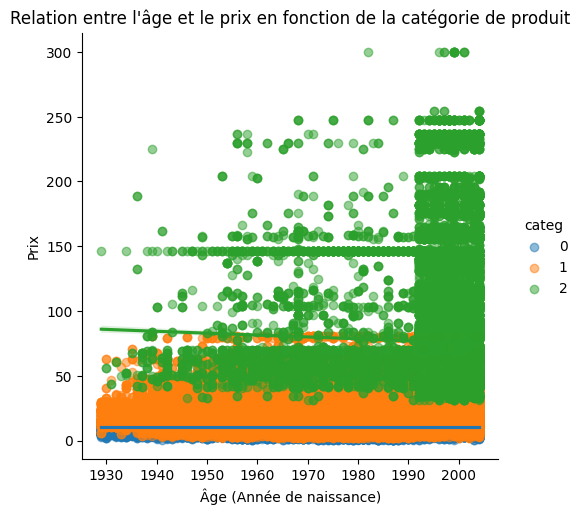

In [ ]:
# Estimation de l'impact pratique de l'âge sur le prix
average_price_increase_per_year = model.params['birth']

print(f"Estimation de l'impact pratique de l'âge sur le prix est de {average_price_increase_per_year:.4f}  par année d'âge supplémentaire.")

# Exploration de la relation entre l'âge et le prix en fonction de la catégorie de produit
sns.lmplot(x='birth', y='price', hue='categ', data=transac_customers, scatter_kws={'alpha':0.5})
plt.xlabel('Âge (Année de naissance)')
plt.ylabel('Prix')
plt.title('Relation entre l\'âge et le prix en fonction de la catégorie de produit')
plt.show()


<span style="color:darkorange;">Le prix des produits augmente d'environ 0.28€ pour chaque année d'âge supplémentaire.</span>

<span style="color:darkorange;">Les résultats de la régression linéaire suggèrent que la relation entre l'âge et le prix est statistiquement significative, mais le coefficient de détermination (R-squared) est relativement faible (seulement 4.3%). Cela signifie que l'âge explique une petite partie de la variation observée dans le prix des produits.</span>

In [ ]:
import statsmodels.api as sm

# Assuming 'birth' is a numeric variable
X = sm.add_constant(transac_customers['birth'])
y_price = transac_customers['price'].values.reshape(-1, 1)
y_categ = transac_customers['categ'].values.reshape(-1, 1)

model_price = sm.OLS(y_price, X).fit()
model_categ = sm.OLS(y_categ, X).fit()

print(model_price.summary())
print(model_categ.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                 3.094e+04
Date:                Tue, 06 Feb 2024   Prob (F-statistic):               0.00
Time:                        11:15:19   Log-Likelihood:            -2.9558e+06
No. Observations:              687298   AIC:                         5.912e+06
Df Residuals:                  687296   BIC:                         5.912e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -532.7942      3.129   -170.301      0.0

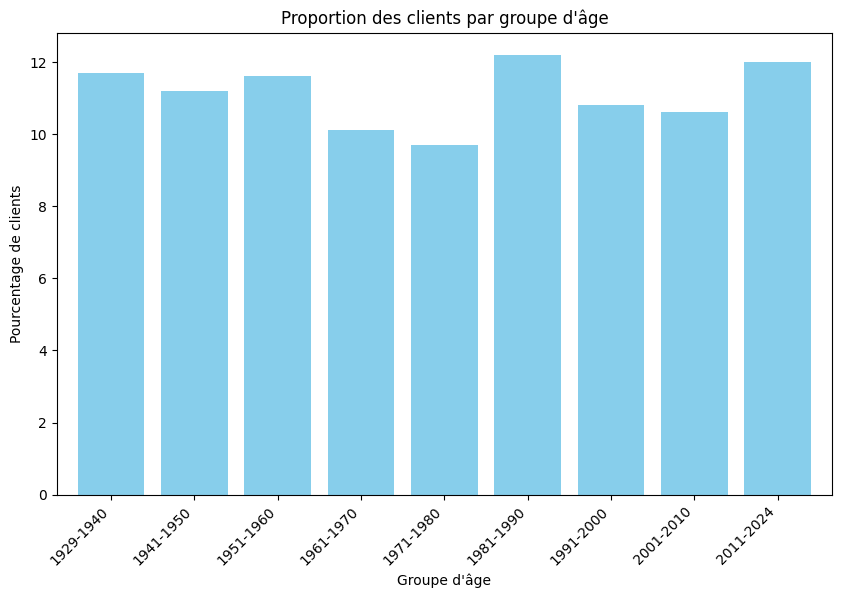

In [ ]:
# Génération d'une liste étendue de dates de naissance
start_date = datetime(1929, 1, 1)
end_date = datetime.now()
date_range = [start_date + timedelta(days=random.randint(1, (end_date - start_date).days)) for _ in range(1000)]

# Création du DataFrame avec des dates de naissance variées
df_extended = pd.DataFrame({'client_id': range(1, 1001), 'birth_date': date_range})

# Divisez les clients en tranches d'âge
bins = [1929, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, end_date.year]
labels = ['1929-1940', '1941-1950', '1951-1960', '1961-1970', '1971-1980', '1981-1990', '1991-2000', '2001-2010', '2011-' + str(end_date.year)]
df_extended['age_group'] = pd.cut(df_extended['birth_date'].dt.year, bins=bins, labels=labels, right=False)

# Calcul du nombre de clients par groupe d'âge
count_by_age_group = df_extended['age_group'].value_counts()

# Calcul des proportions
proportions = count_by_age_group / len(df_extended) * 100

# Tracer le diagramme en pourcentage
plt.figure(figsize=(10, 6))
proportions.sort_index().plot(kind='bar', color='skyblue', width=0.8)
plt.title('Proportion des clients par groupe d\'âge')
plt.xlabel('Groupe d\'âge')
plt.ylabel('Pourcentage de clients')
plt.xticks(rotation=45, ha='right')
plt.show()


<span style="color:darkorange;">Nous constatons une diversité significative dans les tranches d'âge des clients, avec une proportion plus élevée de clients appartenant aux groupes 2011-2024, 1991-2000 et 1929-1940.</span>

C:\Users\Rorsharks\AppData\Local\Temp\ipykernel_13924\314216916.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age_group', data=transac_customers, palette='viridis')


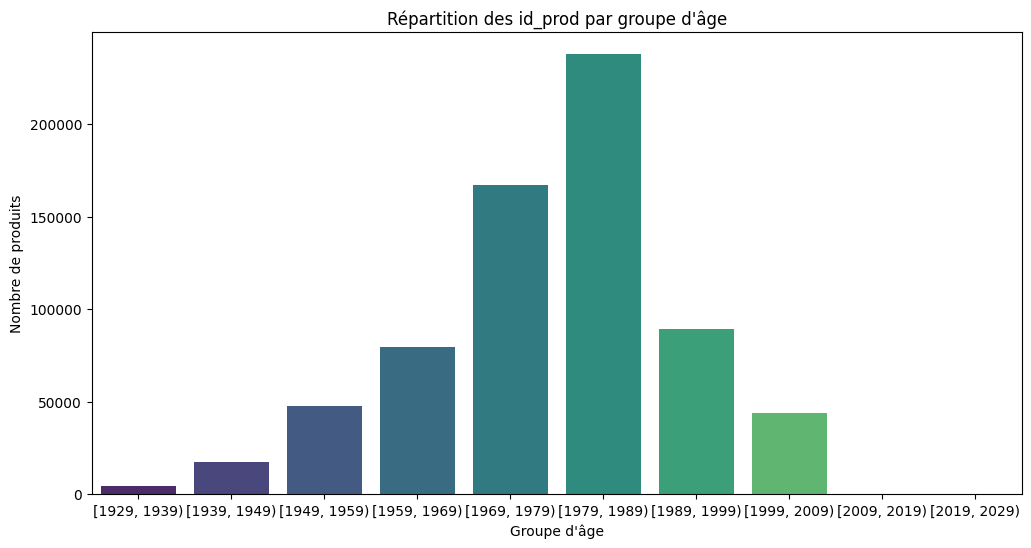

In [ ]:
#Répartition des id_prod par groupe d'âge
# Création de groupes d'âge
bins = list(range(1929, 2030, 10))  # Crée des intervalles de 10 ans de 1929 à 2029

# Ajout d'une colonne 'age_group' basée sur les intervalles définis
transac_customers['age_group'] = pd.cut(transac_customers['birth'], bins=bins, right=False)

# Plot avec seaborn
plt.figure(figsize=(12, 6))
sns.countplot(x='age_group', data=transac_customers, palette='viridis')

# Ajout de labels et titre
plt.xlabel('Groupe d\'âge')
plt.ylabel('Nombre de produits')
plt.title('Répartition des id_prod par groupe d\'âge')

# Affichage du plot
plt.show()


<span style="color:darkorange;">La préférence pour un nombre plus élevé de produits est notable chez les groupes d'âge de 1979 à 1989 et de 1969 à 1979. En revanche, la distribution des autres produits reste relativement basse, en particulier pour le groupe des 1929-1939 et 1939-1949.</span>

C:\Users\Rorsharks\AppData\Local\Temp\ipykernel_13924\2023876291.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age_group', data=transac_customers, palette='viridis')


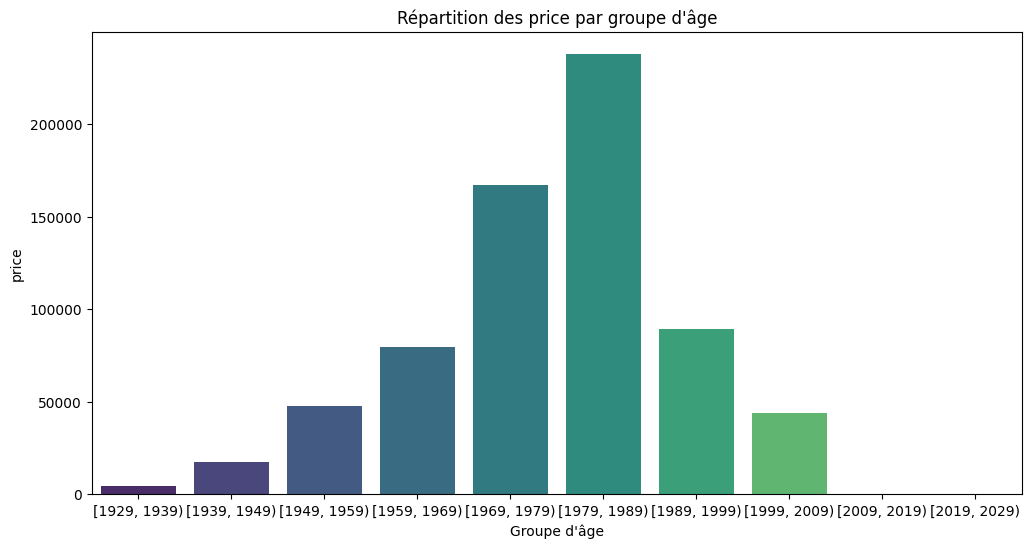

In [ ]:
# Répartition du prix par groupe d'âge
# Plot avec seaborn
plt.figure(figsize=(12, 6))
sns.countplot(x='age_group', data=transac_customers, palette='viridis')

# Ajout de labels et titre
plt.xlabel('Groupe d\'âge')
plt.ylabel('price')
plt.title('Répartition des price par groupe d\'âge')

# Affichage du plot
plt.show()

<span style="color:darkorange;">Il est observé que la répartition des prix fluctue en fonction des groupes d'âge, avec une tendance à la génération de chiffre d'affaires plus élevé chez les groupes 1979-1989 et 1969-1979. On constate une similarité dans la distribution par groupe, parallèlement à celle des identifiants de produits.</span>

C:\Users\Rorsharks\AppData\Local\Temp\ipykernel_13924\3657313580.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='categ', data=transac_customers, palette='viridis')


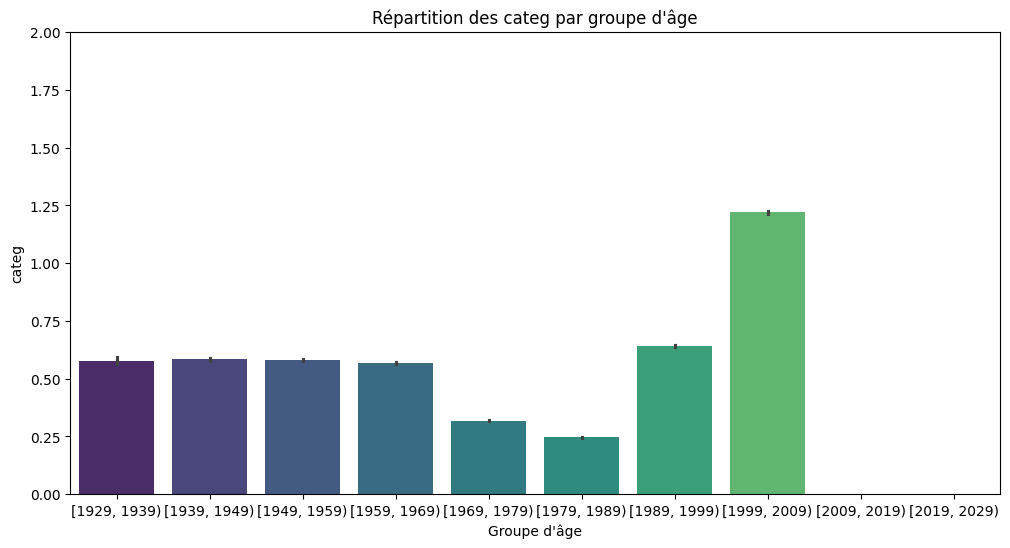

In [ ]:
#Répartition des cathégories par âge 
# Plot avec seaborn 
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='categ', data=transac_customers, palette='viridis')

# Ajout de labels et titre
plt.xlabel('Groupe d\'âge')
plt.ylabel('categ')

# Limiter l'axe y de 0 à 2
plt.ylim(0, 2)

plt.title('Répartition des categ par groupe d\'âge')

# Affichage du plot
plt.show()

<span style="color:darkorange;">Une tendance est notée chez les groupes à se situer majoritairement dans la catégorie 1, exception faite du groupe 1999-2009 qui demeure dans la catégorie 1 tout en se rapprochant de la catégorie 2.</span>

C:\Users\Rorsharks\AppData\Local\Temp\ipykernel_13924\843811916.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='age_group', y='price', data=transac_customers, palette='viridis', ci=None)  # ci=None pour désactiver l'intervalle de confiance
C:\Users\Rorsharks\AppData\Local\Temp\ipykernel_13924\843811916.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='price', data=transac_customers, palette='viridis', ci=None)  # ci=None pour désactiver l'intervalle de confiance


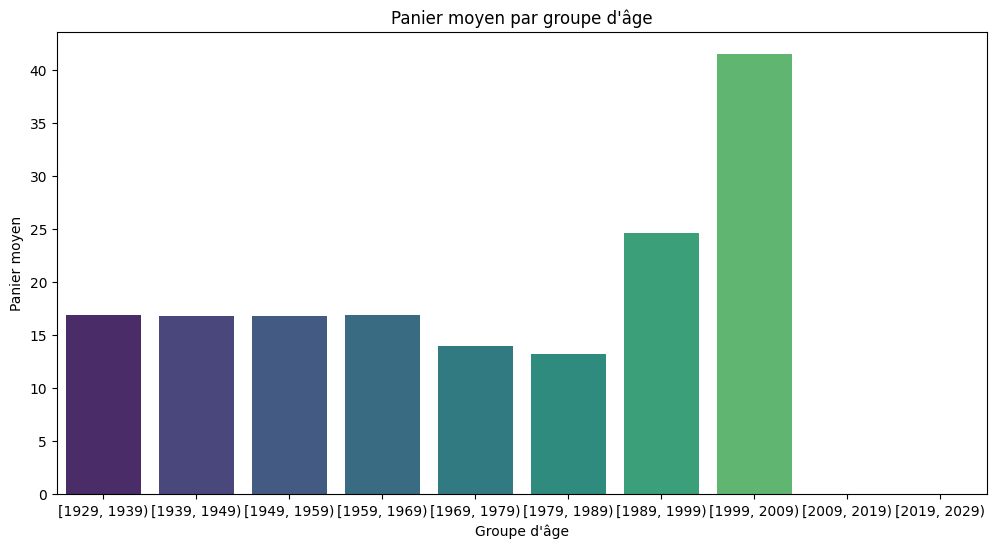

In [ ]:
#Panier moyen par groupe d'âge 
# Plot avec seaborn (utilisation de barplot pour afficher le panier moyen)
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='price', data=transac_customers, palette='viridis', ci=None)  # ci=None pour désactiver l'intervalle de confiance

# Ajout de labels et titre
plt.xlabel('Groupe d\'âge')
plt.ylabel('Panier moyen')
plt.title('Panier moyen par groupe d\'âge')

# Affichage du plot
plt.show()

<span style="color:darkorange;">Le panier moyen reste stable pour les trois premiers groupes de notre graphique (1929-1969), avec une moyenne de 15€. Le groupe 1999-2009 se distingue nettement avec un panier moyen de 40€, suivi du groupe 1989-1999 en deuxième position avec un panier moyen de 25€.</span>

#### <span style="color: #87CEEB;">c.VI)Répartition par âge et produits </span>

In [ ]:
transac_customers

,index,id_prod,price,categ,date,session_id,client_id,sex,birth,heure,cat_as_int,age_group
0,0,0_1421,19.99,0,2021-03-01 04:13:00.107748,s_101,c_8533,m,1972,4,0,"[1969, 1979)"
1,1,0_1421,19.99,0,2022-10-01 04:13:00.107748,s_276043,c_8533,m,1972,4,0,"[1969, 1979)"
2,2,0_1421,19.99,0,2022-12-01 04:13:00.107748,s_305391,c_8533,m,1972,4,0,"[1969, 1979)"
3,3,0_1421,19.99,0,2023-01-01 04:13:00.107748,s_320253,c_8533,m,1972,4,0,"[1969, 1979)"
4,4,0_2199,12.99,0,2021-03-25 17:43:48.819074,s_11366,c_8533,m,1972,17,0,"[1969, 1979)"
...,...,...,...,...,...,...,...,...,...,...,...,...
687293,687529,2_163,68.99,2,2022-10-28 16:51:07.389515,s_289331,c_7739,m,1997,16,2,"[1989, 1999)"
687294,687530,2_101,63.99,2,2021-07-21 09:11:12.619736,s_65192,c_7089,m,2002,9,2,"[1999, 2009)"
687295,687531,2_101,63.99,2,2022-03-21 09:11:12.619736,s_182240,c_7089,m,2002,9,2,"[1999, 2009)"
687296,687532,2_101,63.99,2,2022-10-21 09:11:12.619736,s_285788,c_7089,m,2002,9,2,"[1999, 2009)"


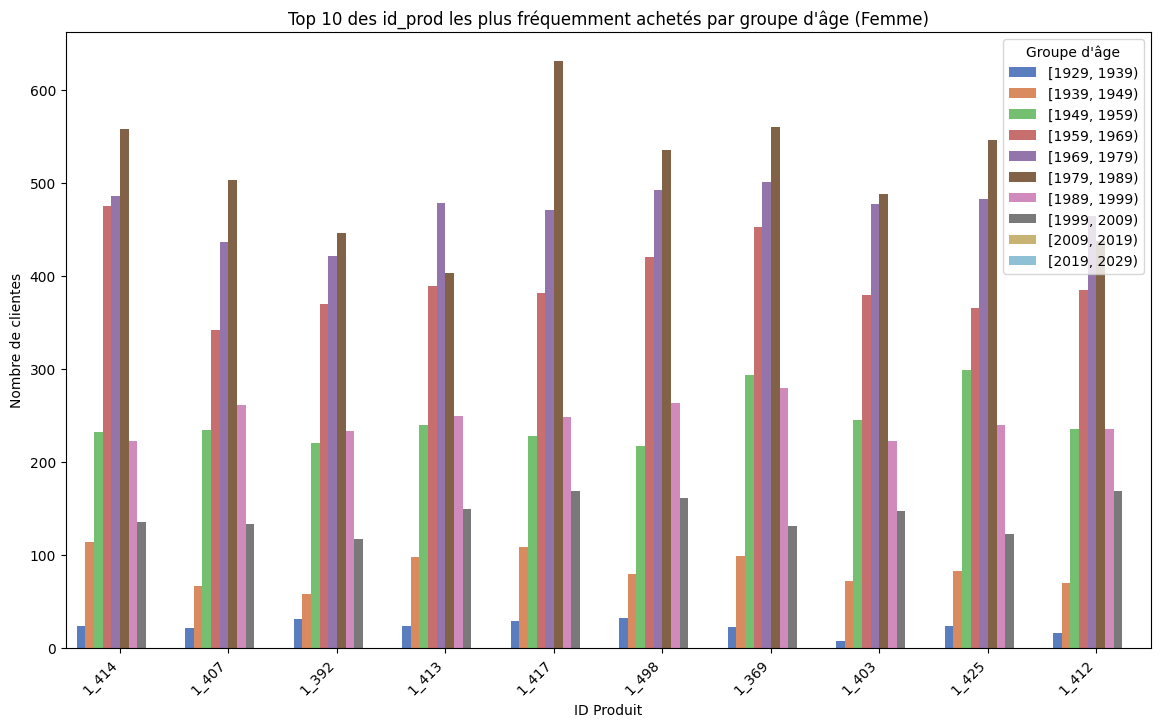

In [ ]:
# Calcul du top 10 des produits les plus fréquemment achetés par les femmes
top_products_female = transac_customers[transac_customers['sex'] == 'f']['id_prod'].value_counts().nlargest(10).index

# Filtrage du DataFrame pour inclure uniquement les lignes correspondant au top 10 des produits
transac_customers_top10_female = transac_customers[transac_customers['id_prod'].isin(top_products_female)]

# Plot avec seaborn
plt.figure(figsize=(14, 8))
sns.countplot(x='id_prod', hue='age_group', data=transac_customers_top10_female, palette='muted')
plt.title('Top 10 des id_prod les plus fréquemment achetés par groupe d\'âge (Femme)')
plt.xlabel('ID Produit')
plt.ylabel('Nombre de clientes')

# Mettre à jour les étiquettes de l'axe x avec les noms des id_prod
plt.xticks(rotation=45, ha='right')

plt.legend(title='Groupe d\'âge')
plt.show()


<span style="color:darkorange;">On observe des variations dans la fréquence d'achat par produit et groupe d'âge. Par exemple, en examinant le produit 1_414, nous constatons que les tranches d'âge où les achats sont les plus fréquents se répartissent principalement en trois groupes : 1959-1969, 1969-1979, 1979-1989. Les autres groupes présentent une participation relativement minoritaire dans la fréquence d'achat, en particulier les groupes 1929-1939, 1939-1949 et 1949-1959. Il est intéressant de noter que sur notre top 10, la répartition des groupes d'âge est similaire pour les achats les plus fréquents, notamment pour le genre féminin.</span>

<span style="color:darkorange;">À noter une tendance moyenne d'achat autour de 350€ pour le groupe 1989-1999 sur l'ensemble des id_prod. De manière similaire, cette tendance se maintient pour le groupe 1999-2009, avec une moyenne d'achat autour de 150€.</span>

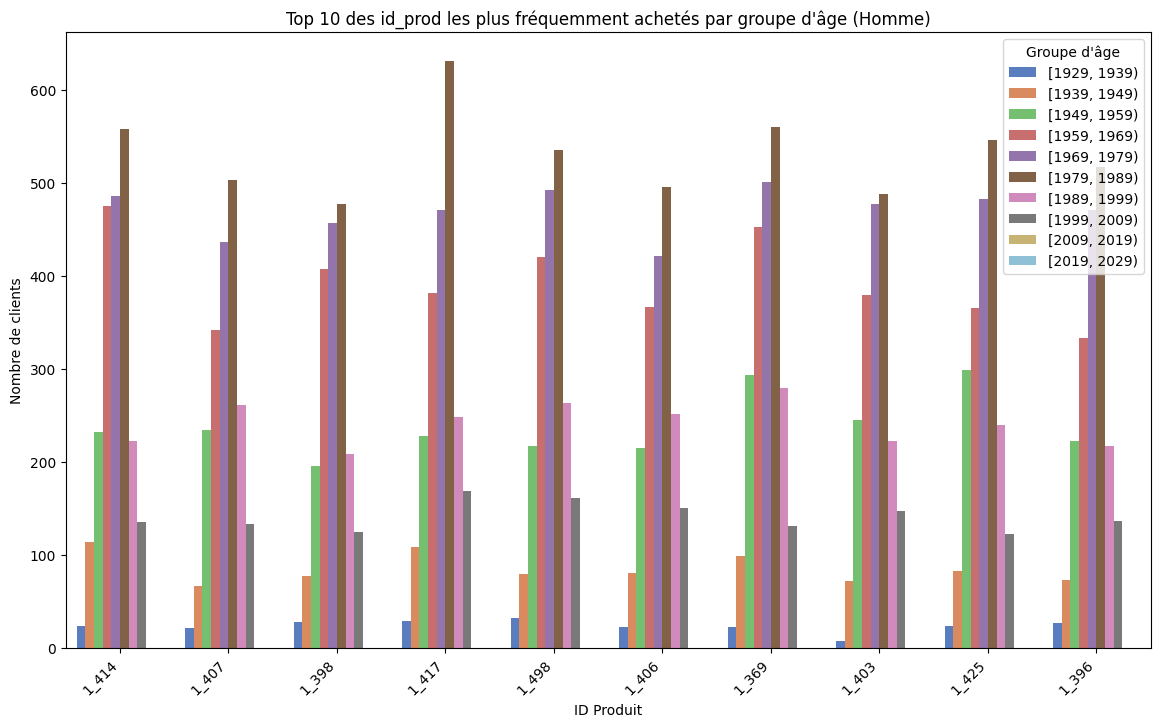

In [ ]:
# Calcul du top 10 des produits les plus fréquemment achetés par les hommes
top_products_male = transac_customers[transac_customers['sex'] == 'm']['id_prod'].value_counts().nlargest(10).index

# Filtrage du DataFrame pour inclure uniquement les lignes correspondant au top 10 des produits
transac_customers_top10_male = transac_customers[transac_customers['id_prod'].isin(top_products_male)]

# Plot avec seaborn
plt.figure(figsize=(14, 8))
sns.countplot(x='id_prod', hue='age_group', data=transac_customers_top10_male, palette='muted')
plt.title('Top 10 des id_prod les plus fréquemment achetés par groupe d\'âge (Homme)')
plt.xlabel('ID Produit')
plt.ylabel('Nombre de clients')

# Mettre à jour les étiquettes de l'axe x avec les noms des id_prod
plt.xticks(rotation=45, ha='right')

plt.legend(title='Groupe d\'âge')
plt.show()

<span style="color:darkorange;">La tendance est similaire pour le genre masculin dans nos catégories de groupes d'âge, et nous retrouvons des id_prod identiques présents dans notre catégorie de genre féminin, par exemple : 1_414,1_407,1_498.</span>

<span style=";font-weight: bold; text-align: center; display: block; margin: auto; font-size: 2em;">Conclusion</span>

L'analyse approfondie de la base de données révèle des tendances significatives dans les ventes, les produits, les clients et le temps. Les ventes globales affichent une progression positive avec des variations saisonnières et des pics récurrents, bien que la baisse en 2023 souligne l'importance d'une collecte de données continue. L'analyse des produits met en lumière la diversité des performances, avec une dominance des catégories 0 et 1 dans le chiffre d'affaires global. Les performances des clients varient, mettant en évidence des opportunités d'optimisation des ventes et de personnalisation des stratégies. L'analyse temporelle révèle des variations horaires et une stabilisation en 2022, tandis que la décomposition mobile souligne des fluctuations quotidiennes et saisonnières. En segmentant par genre, des disparités dans la répartition du chiffre d'affaires sont observées, et la catégorie 0, bien que non présente dans les tops, génère un chiffre d'affaires important grâce aux ventes en quantité. En segmentant par âge, des différences dans la répartition du chiffre d'affaires soulignent l'importance de stratégies adaptées aux segments d'âge.

Les tests statistiques k2 et Shapiro indiquent que la distribution des prix est anormale. Cependant, la série temporelle ne présente pas de changement significatif au fil du temps pour les années 2021-2022. Pour optimiser davantage les performances, il est recommandé d'intégrer des informations clients plus détaillées, de classer les produits de manière plus exhaustive, d'adopter une approche plus ciblée pour les promotions, et d'utiliser des données historiques pour anticiper les tendances futures. Une gestion plus complète des produits, une segmentation client plus fine, et une optimisation des stratégies commerciales et marketing peuvent être envisagées pour améliorer les résultats globaux.

<span style=";font-weight: bold;;">Proposition</span>


1. **Intégration de Données Clients :**
   - Collecter et intégrer des informations clients telles que le nom, prénom, adresse, numéro de téléphone et e-mail pour une personnalisation accrue des interactions.
   - Ciblage de produits.
   - Propositions personnalisée.
   - E-mails ciblés.
   - Proposition de produits.

2. **Classification et Enrichissement des Produits :**
   - Classer les produits par genre et introduire des noms, descriptions, notations, et indications de prix brut/net pour une gestion plus transparente et une communication claire avec les clients.
   - Mettre en avant certains produits en fournissant des identifications détaillées et des résumés attractifs pour stimuler l'intérêt des clients.

3. **Résumés de Produits et Notations :**
   - Créer des résumés de produits détaillés pour faciliter la compréhension et intégrer un système de notation pour permettre aux clients de partager leurs expériences.

4. **Gestion de Stock :**
   - Mettre en place un système de gestion de stock pour assurer une visibilité en temps réel des niveaux de stock, permettant une planification plus précise des ventes et des réapprovisionnements.

5. **Segmentation Client Avancée :**
   - Affiner la segmentation client en fonction de critères plus spécifiques pour des campagnes marketing plus ciblées et une personnalisation approfondie.

6. **Utilisation de Données Historiques :**
   - Exploiter les données historiques pour prédire les tendances futures, optimiser les stocks, et adapter les stratégies commerciales aux comportements d'achat antérieurs.

7. **Formation et Sensibilisation :**
   - Mettre en place des programmes de formation pour le personnel afin d'optimiser l'utilisation des données et sensibiliser à l'importance des bonnes pratiques en matière de gestion de l'information.

8. **Partenariats Stratégiques :**
   - Explorer des partenariats stratégiques avec des fournisseurs ou d'autres entreprises pour élargir la gamme de produits et attirer de nouveaux segments de clients.

9. **Technologies d'Analyse Prédictive :**
   - Investir dans des outils d'analyse prédictive pour anticiper les tendances du marché, optimiser les opérations et identifier de nouvelles opportunités commerciales.

10. **Communication Client :**
    - Améliorer la communication avec les clients en fournissant des informations détaillées sur les produits, des résumés attractifs, des identifications uniques, et en encourageant la participation à des événements en ligne tels que des découvertes d'auteurs, des webinaires sur des thèmes littéraires, et des podcasts d'avis sur des livres et des auteurs.
    - Communication par mails.
    - Programme de fidélités.
   

En intégrant ces initiatives, l'entreprise peut non seulement optimiser ses opérations, mais également offrir une expérience client enrichissante, renforçant ainsi sa position sur le marché.